In [1]:
from spike_train_tools.ising import run_metropolis, plot_ising_overview, activity, covariance, fit_ising
from spike_train_tools.tools import simulate_spiketrains

import numpy as np
import matplotlib.pyplot as plt

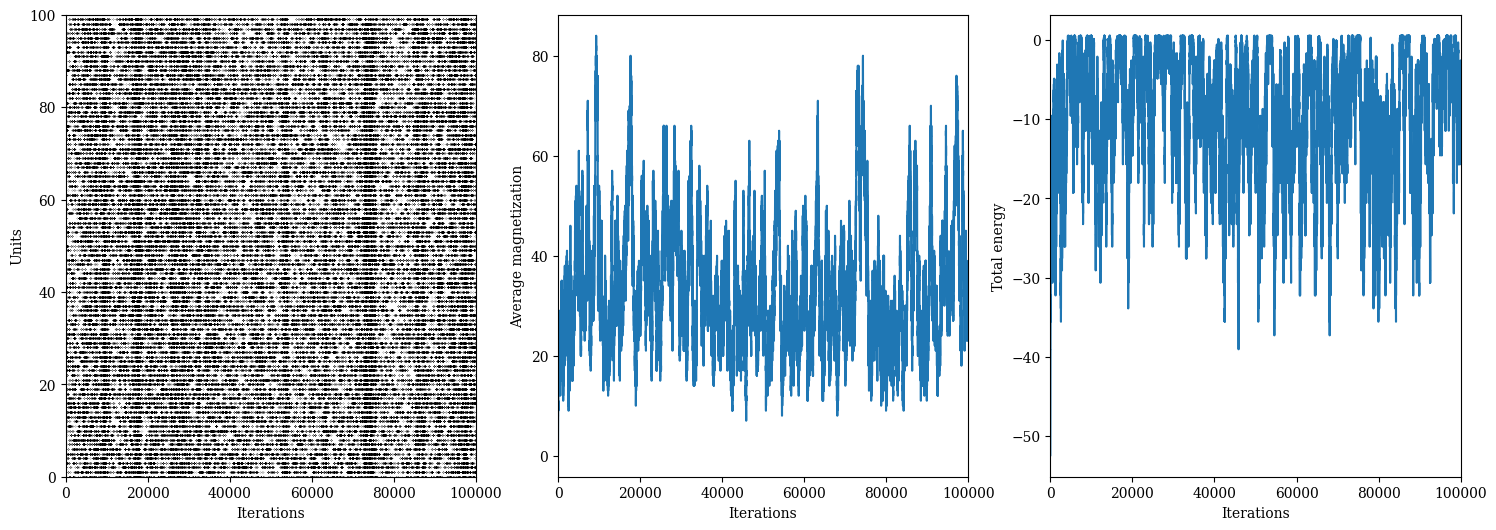

In [10]:
N_neurons = 100
state0 = -1*np.ones(N_neurons)
N_iterations = 100000
h = -0.03*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0

states, energies = run_metropolis(state0, N_iterations, h, J)

plot_ising_overview(states, energies)

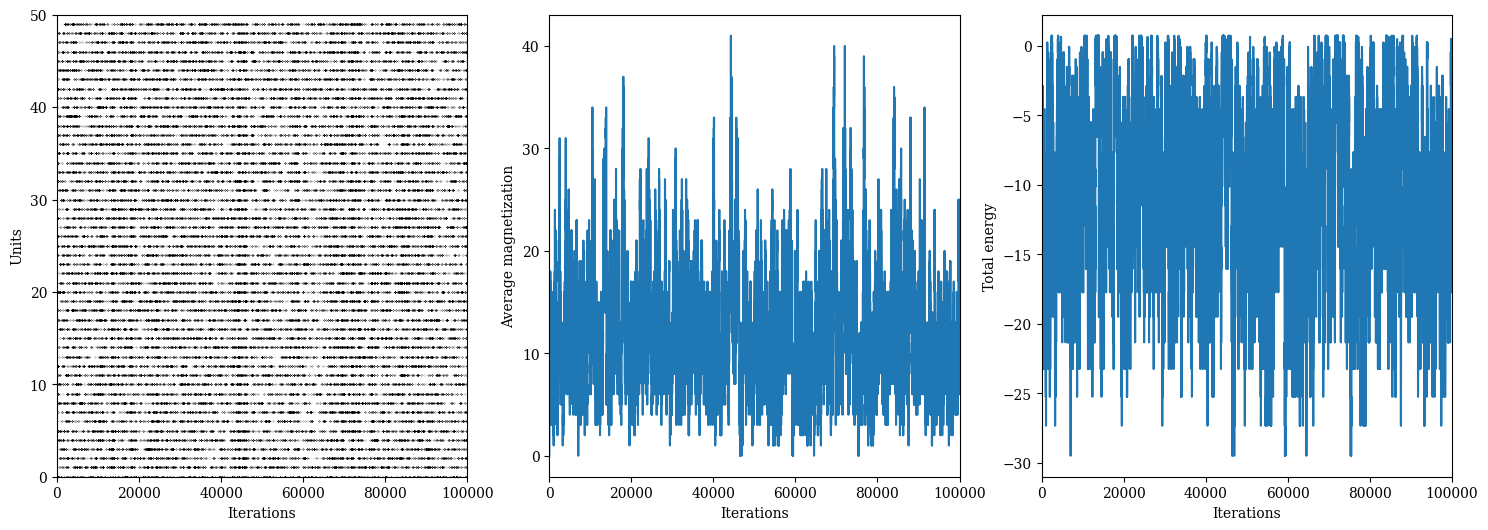

In [32]:
N_neurons = 50

h_sim = -0.1*np.ones(N_neurons)
J_sim = 0.02*np.ones((N_neurons, N_neurons))
state0 = -1*np.ones(N_neurons)

states, energies = run_metropolis(state0, 100000, h_sim, J_sim)

plot_ising_overview(states, energies)

In [2]:
N_neurons = 100
N_its_eq = 1000
N_its_fit = 1000

sample_rate = 100
t_tot = 100
rate = 20

trains_obs = 2*simulate_spiketrains(N_neurons, rate, t_tot, sample_rate)-1

activity_obs = activity(trains_obs)
cov_obs = covariance(trains_obs)

h = 1*np.ones(N_neurons)
J = -1*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0
state0 = 1*np.ones(N_neurons)

h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0,
                       h_learning_rate=1, h_learning_rate_scaling=0,
                       J_learning_rate=1, J_learning_rate_scaling=0)

  0%|          | 2/999 [00:01<11:13,  1.48it/s]

0.35401859814018605 -0.9900983700007738 0.645981401859814 [[ 0.         -0.0523934  -0.25217076 ... -0.06562004 -0.05564931
   0.08653393]
 [-0.0523934   0.          0.10680552 ... -0.22701483 -0.08232945
   0.07899204]
 [-0.25217076  0.10680552  0.         ... -0.13440084 -0.09819212
   0.0353936 ]
 ...
 [-0.06562004 -0.22701483 -0.13440084 ...  0.         -0.10238876
  -0.07234885]
 [-0.05564931 -0.08232945 -0.09819212 ... -0.10238876  0.
  -0.23764555]
 [ 0.08653393  0.07899204  0.0353936  ... -0.07234885 -0.23764555
   0.        ]]
-0.28527947205279475 -0.9806848075629526 0.6392980701929807 [[ 0.          0.05132062  0.20287126 ... -0.10964539  0.18066103
  -0.1896863 ]
 [ 0.05132062  0.          0.06345967 ... -0.05313841  0.00365543
  -0.05299556]
 [ 0.20287126  0.06345967  0.         ...  0.03887882  0.10988222
  -0.05544039]
 ...
 [-0.10964539 -0.05313841  0.03887882 ...  0.         -0.02886659
   0.21102127]
 [ 0.18066103  0.00365543  0.10988222 ... -0.02886659  0.
  -0.073355

  0%|          | 4/999 [00:01<05:28,  3.03it/s]

-0.9188881111888808 -0.9717396594295056 0.6336086391360863 [[ 0.          0.37368546  0.0478899  ...  0.0639844  -0.30752889
  -0.22311102]
 [ 0.37368546  0.         -0.12631302 ...  0.02239252  0.08644075
   0.00732913]
 [ 0.0478899  -0.12631302  0.         ... -0.22081056 -0.17213569
  -0.3208733 ]
 ...
 [ 0.0639844   0.02239252 -0.22081056 ...  0.          0.1777894
  -0.01396833]
 [-0.30752889  0.08644075 -0.17213569 ...  0.1777894   0.
   0.11545023]
 [-0.22311102  0.00732913 -0.3208733  ... -0.01396833  0.11545023
   0.        ]]
-1.5458614138586133 -0.9639373020476922 0.626973302669733 [[ 0.         -0.26653541  0.37742195 ...  0.06461948  0.08225335
   0.23126394]
 [-0.26653541  0.         -0.25576101 ... -0.02445971  0.06713745
   0.02604183]
 [ 0.37742195 -0.25576101  0.         ...  0.02871942 -0.08824023
   0.01928554]
 ...
 [ 0.06461948 -0.02445971  0.02871942 ...  0.          0.05645519
   0.01462396]
 [ 0.08225335  0.06713745 -0.08824023 ...  0.05645519  0.
   0.01944471

  1%|          | 6/999 [00:02<03:54,  4.24it/s]

-2.1658154184581533 -0.9573784563389881 0.61995400459954 [[ 0.00000000e+00 -2.29993999e-04  6.02795035e-02 ... -7.59130166e-02
   1.00274304e-01 -5.12805434e-03]
 [-2.29993999e-04  0.00000000e+00 -2.45140170e-02 ... -2.10113175e-02
  -6.27832827e-02 -9.92950600e-02]
 [ 6.02795035e-02 -2.45140170e-02  0.00000000e+00 ...  3.10477901e-03
   2.28196638e-01  1.29084622e-01]
 ...
 [-7.59130166e-02 -2.10113175e-02  3.10477901e-03 ...  0.00000000e+00
  -8.90438703e-02 -2.20889420e-02]
 [ 1.00274304e-01 -6.27832827e-02  2.28196638e-01 ... -8.90438703e-02
   0.00000000e+00  3.12209715e-01]
 [-5.12805434e-03 -9.92950600e-02  1.29084622e-01 ... -2.20889420e-02
   3.12209715e-01  0.00000000e+00]]
-2.78019198080192 -0.951404363071928 0.6143765623437656 [[ 0.         -0.01932286 -0.14055805 ...  0.0421794   0.06416265
  -0.09424783]
 [-0.01932286  0.         -0.03929218 ... -0.01767754  0.00863667
   0.01129182]
 [-0.14055805 -0.03929218  0.         ...  0.43610106 -0.04929122
   0.02443839]
 ...
 [ 

  1%|          | 8/999 [00:02<03:16,  5.04it/s]

-3.388991100889912 -0.9457969305296623 0.6087991200879912 [[ 0.         -0.01473141 -0.07343903 ...  0.05340216 -0.0376046
   0.0095918 ]
 [-0.01473141  0.          0.13792269 ... -0.10273705  0.12247414
  -0.0064138 ]
 [-0.07343903  0.13792269  0.         ... -0.39129446  0.44255996
  -0.02167702]
 ...
 [ 0.05340216 -0.10273705 -0.39129446 ...  0.         -0.42283643
   0.01397556]
 [-0.0376046   0.12247414  0.44255996 ... -0.42283643  0.
  -0.00723495]
 [ 0.0095918  -0.0064138  -0.02167702 ...  0.01397556 -0.00723495
   0.        ]]
-3.9906369363063687 -0.9403208455832304 0.6016458354164583 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00039656
   0.02053625]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00039656 ... -0.00593393  0.
  -0.17588162

  1%|          | 10/999 [00:02<02:59,  5.52it/s]

-4.5870892910708925 -0.9378634367744149 0.5964523547645235 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.01515101 ...  0.06509178  0.02051878
  -0.00401656]
 [ 0.00419312  0.01515101  0.         ...  0.2764921  -0.0815992
   0.01869286]
 ...
 [ 0.01187762  0.06509178  0.2764921  ...  0.         -0.09478944
  -0.01786815]
 [-0.00318396  0.02051878 -0.0815992  ... -0.09478944  0.
   0.00854973]
 [ 0.01174309 -0.00401656  0.01869286 ... -0.01786815  0.00854973
   0.        ]]
-5.173354664533547 -0.9350181680384327 0.5862653734626537 [[ 0.         -0.00433093  0.00633133 ... -0.00089162 -0.00398244
   0.00289014]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00633133  0.00395269  0.         ... -0.06027862 -0.05603363
  -0.02382735]
 ...
 [-0.00089162 -0.00845831 -0.06027862 ...  0.          0.02389586
   0.11541284]
 [-0.00398244  0.01186035 -0.05603363 ...  0.02389586  0.
   0.04127946

  1%|          | 12/999 [00:03<02:52,  5.74it/s]

-5.754754524547547 -0.9299629521180278 0.5813998600139986 [[ 0.         -0.01017672 -0.27582215 ...  0.01187762  0.00359936
   0.00633849]
 [-0.01017672  0.         -0.02494985 ... -0.00845831  0.01238176
  -0.00309366]
 [-0.27582215 -0.02494985  0.         ... -0.00559632 -0.01647418
   0.01668142]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00359936  0.01238176 -0.01647418 ... -0.00593393  0.
   0.00561008]
 [ 0.00633849 -0.00309366  0.01668142 ... -0.00093893  0.00561008
   0.        ]]
-6.331964803519648 -0.9274148768696695 0.5772102789721028 [[ 0.         -0.00447938  0.00085299 ...  0.01300288 -0.01417696
   0.01645511]
 [-0.00447938  0.          0.00092569 ... -0.01650014  0.02509562
  -0.00880692]
 [ 0.00085299  0.00092569  0.         ...  0.25981783 -0.14937868
   0.07189038]
 ...
 [ 0.01300288 -0.01650014  0.25981783 ...  0.         -0.20148542
   0.18192713]
 [-0.01417696  0.02509562 -0.14937868 ... -0.20148542  0.
   0.23295741

  1%|▏         | 14/999 [00:03<02:49,  5.81it/s]

-6.902083791620838 -0.9222206394701017 0.5701189881011899 [[ 0.         -0.02108726  0.00774565 ... -0.00412893 -0.00318396
   0.01174309]
 [-0.02108726  0.          0.4219752  ... -0.55751009  0.01186035
  -0.00267822]
 [ 0.00774565  0.4219752   0.         ... -0.21816584 -0.00081696
   0.00620636]
 ...
 [-0.00412893 -0.55751009 -0.21816584 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-7.468037196280375 -0.9190138420737702 0.565953404659534 [[ 0.         -0.00433093 -0.03484203 ...  0.01187762  0.03630926
   0.01182036]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.03484203  0.00395269  0.         ... -0.00559632 -0.12803115
   0.00456701]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.03630926  0.01186035 -0.12803115 ... -0.00593393  0.
   0.0067209 ]

  2%|▏         | 16/999 [00:03<02:48,  5.84it/s]

-8.024837516248372 -0.9155691667685305 0.5568003199680032 [[ 0.         -0.16773345  0.14060944 ...  0.01187762 -0.00318396
   0.33649994]
 [-0.16773345  0.         -0.03916049 ... -0.00845831  0.01186035
  -0.12715821]
 [ 0.14060944 -0.03916049  0.         ... -0.00559632 -0.00081696
   0.06216817]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.33649994 -0.12715821  0.06216817 ... -0.00093893  0.00512801
   0.        ]]
-8.576654334566543 -0.9123056614497043 0.5518168183181681 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.         -0.02170806 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312 -0.02170806  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

  2%|▏         | 18/999 [00:04<02:45,  5.93it/s]

-9.124327567243276 -0.9098461266176294 0.5476732326767323 [[ 0.          0.01857165  0.00419312 ...  0.12804131 -0.00318396
  -0.18118464]
 [ 0.01857165  0.          0.00395269 ...  0.10968022  0.01186035
  -0.11110614]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.12804131  0.10968022 -0.00559632 ...  0.         -0.00593393
  -0.20631362]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [-0.18118464 -0.11110614  0.00620636 ... -0.20631362  0.00512801
   0.        ]]
-9.6609499050095 -0.9069379727542515 0.5366223377662234 [[ 0.         -0.00433093  0.00419312 ...  0.01179252 -0.0031011
   0.02924071]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01179252 -0.00845831 -0.00559632 ...  0.         -0.0058777
  -0.00426403]
 [-0.0031011   0.01186035 -0.00081696 ... -0.0058777   0.
   0.00836561]
 [

  2%|▏         | 20/999 [00:04<02:43,  5.97it/s]

-10.193920607939203 -0.9034932228053553 0.5329707029297069 [[ 0.         -0.00433093  0.00419312 ...  0.01006839  0.03405231
  -0.06967262]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01006839 -0.00845831 -0.00559632 ...  0.          0.0358765
   0.01285927]
 [ 0.03405231  0.01186035 -0.00081696 ...  0.0358765   0.
  -0.06960668]
 [-0.06967262 -0.00267822  0.00620636 ...  0.01285927 -0.06960668
   0.        ]]
-10.722851714828519 -0.9007511134041517 0.528931106889311 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.          0.00164147
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ...  0.00164147  0.
   0.00512801

  2%|▏         | 21/999 [00:04<02:43,  5.98it/s]

-11.243849615038496 -0.8961100376980268 0.5209979002099789 [[ 0.         -0.00433093 -0.00595525 ... -0.66583375 -0.14031382
  -0.41565702]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.00595525  0.00395269  0.         ... -0.02312242 -0.00427546
  -0.01913897]
 ...
 [-0.66583375 -0.00845831 -0.02312242 ...  0.         -0.15436413
   0.45452045]
 [-0.14031382  0.01186035 -0.00427546 ... -0.15436413  0.
   0.095006  ]
 [-0.41565702 -0.00267822 -0.01913897 ...  0.45452045  0.095006
   0.        ]]
-11.760819918008194 -0.8933143061732993 0.516970302969703 [[ 0.00000000e+00 -1.77717655e-02  1.81835351e-01 ...  1.33202118e-01
   5.34618751e-01  1.17430913e-02]
 [-1.77717655e-02  0.00000000e+00  1.55688861e-04 ... -1.10515496e-02
  -5.47378519e-03 -2.67822433e-03]
 [ 1.81835351e-01  1.55688861e-04  0.00000000e+00 ... -1.39188161e-02
   1.64330492e-01  6.20635867e-03]
 ...
 [ 1.33202118e-01 -1.10515496e-02 -1.39188161e-02 ...  0.00000000e+00
   1.068569

  2%|▏         | 24/999 [00:05<02:45,  5.91it/s]

-12.271034896510349 -0.8886198211010968 0.5102149785021497 [[ 0.         -0.003986   -0.00176069 ...  0.01323623 -0.00038864
   0.01914561]
 [-0.003986    0.          0.01308186 ... -0.01238132  0.00573437
   0.01396845]
 [-0.00176069  0.01308186  0.         ... -0.18585687 -0.14745207
   0.20212637]
 ...
 [ 0.01323623 -0.01238132 -0.18585687 ...  0.          0.2897932
  -0.08513025]
 [-0.00038864  0.00573437 -0.14745207 ...  0.2897932   0.
  -0.11394197]
 [ 0.01914561  0.01396845  0.20212637 ... -0.08513025 -0.11394197
   0.        ]]
-12.775886411358867 -0.8857162597333151 0.5048515148485151 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.09983935
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.09983935 -0.00081696 ... -0.00593393  0.
   0.0051280

  3%|▎         | 26/999 [00:05<02:43,  5.94it/s]

-13.274108589141088 -0.8830612630177941 0.4982221777822217 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.         -0.28056001 ...  0.01981296  0.01186035
   0.48464051]
 [ 0.00419312 -0.28056001  0.         ... -0.01788698 -0.00081696
  -0.21434473]
 ...
 [ 0.01187762  0.01981296 -0.01788698 ...  0.         -0.00593393
  -0.01657552]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309  0.48464051 -0.21434473 ... -0.01657552  0.00512801
   0.        ]]
-13.766215378462157 -0.8795682155773642 0.4921067893210679 [[ 0.         -0.38466146  0.00419312 ...  0.10567342  0.30654553
   0.01174309]
 [-0.38466146  0.          0.00395269 ...  0.29523039 -0.69854968
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.10567342  0.29523039 -0.00559632 ...  0.         -0.24404231
  -0.00093893]
 [ 0.30654553 -0.69854968 -0.00081696 ... -0.24404231  0.
   0.005128

  3%|▎         | 28/999 [00:05<02:42,  5.97it/s]

-14.249961003899614 -0.8771487553804668 0.4837456254374562 [[ 0.         -0.00090302 -0.02226691 ...  0.04034233  0.01264519
  -0.06010426]
 [-0.00090302  0.          0.04291818 ... -0.06027195 -0.01695309
  -0.02988038]
 [-0.02226691  0.04291818  0.         ... -0.67954013 -0.50793345
   0.1649846 ]
 ...
 [ 0.04034233 -0.06027195 -0.67954013 ...  0.          0.48433217
  -0.21042179]
 [ 0.01264519 -0.01695309 -0.50793345 ...  0.48433217  0.
  -0.12048398]
 [-0.06010426 -0.02988038  0.1649846  ... -0.21042179 -0.12048398
   0.        ]]
-14.732158784121587 -0.8736145655265068 0.4821977802219778 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.14362491 ...  0.2146817   0.07503791
  -0.00267822]
 [ 0.00419312  0.14362491  0.         ...  0.60646846  0.35275573
   0.00620636]
 ...
 [ 0.01187762  0.2146817   0.60646846 ...  0.          0.27091969
  -0.00093893]
 [-0.00318396  0.07503791  0.35275573 ...  0.27091969  0.
   0.005128

  3%|▎         | 29/999 [00:06<02:46,  5.83it/s]

-15.205009499050092 -0.8713016371050172 0.4728507149285071 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.09873113  0.03903359
  -0.19297448]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.09873113 -0.00559632 ...  0.         -0.23571633
   0.03774837]
 [-0.00318396  0.03903359 -0.00081696 ... -0.23571633  0.
  -0.03926423]
 [ 0.01174309 -0.19297448  0.00620636 ...  0.03774837 -0.03926423
   0.        ]]
-15.67249675032496 -0.8688607158429718 0.46748725127487245 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.55045086
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.55045086 -0.00081696 ... -0.00593393  0.
   0.005128

  3%|▎         | 32/999 [00:06<02:48,  5.74it/s]

-16.13793620637936 -0.8665601102901189 0.4654394560543945 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-16.59646235376462 -0.8647892282094964 0.45852614738526143 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

  3%|▎         | 34/999 [00:06<02:44,  5.86it/s]

-17.050534946505348 -0.8638458244713951 0.45407259274072587 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-17.49036496350365 -0.8620772818339718 0.43983001699830016 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

  4%|▎         | 36/999 [00:07<02:45,  5.83it/s]

-17.93148485151485 -0.8590822731080913 0.44111988801119884 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.30915789
  -0.29248334]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.30915789 ... -0.00593393  0.
   0.84768078]
 [ 0.01174309 -0.00267822 -0.29248334 ... -0.00093893  0.84768078
   0.        ]]
-18.37033096690331 -0.8559956424974029 0.4388461153884611 [[ 0.         -0.00433093  0.24463463 ...  0.01187762  0.33512941
   0.01715729]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.24463463  0.00395269  0.         ... -0.00559632  0.23646678
   0.02835581]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.33512941  0.01186035  0.23646678 ... -0.00593393  0.
   0.0104711

  4%|▍         | 38/999 [00:07<02:40,  5.99it/s]

-18.80397760223977 -0.8552590851536112 0.4336466353364663 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
  -0.00310514]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [-0.00310514 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-19.23636236376362 -0.8522886598663525 0.4323847615238475 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.04346707
   0.04177912]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.04346707 -0.00081696 ... -0.00593393  0.
  -0.63098764

  4%|▍         | 40/999 [00:07<02:43,  5.87it/s]

-19.655478452154785 -0.849525539362529 0.4191160883911608 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00034029 -0.00081696
   0.06132429]
 ...
 [ 0.01187762 -0.00845831 -0.00034029 ...  0.         -0.00593393
  -0.09921304]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.06132429 ... -0.09921304  0.00512801
   0.        ]]
-20.07280671932807 -0.8466420636097466 0.41732826717328264 [[ 0.         -0.00433093 -0.64153049 ...  0.01187762 -0.00318396
  -0.07876609]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.64153049  0.00395269  0.         ... -0.00559632 -0.00081696
  -0.03346351]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

  4%|▍         | 42/999 [00:08<02:41,  5.94it/s]

-20.479860013998604 -0.8443392647097264 0.40705329467053286 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-20.890170982901704 -0.8433663343923877 0.41031096890310964 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

  4%|▍         | 44/999 [00:08<02:39,  5.97it/s]

-21.290688931106896 -0.8410052891866555 0.40051794820517944 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-21.690324967503248 -0.8386964471397695 0.3996360363963603 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.20300728 ... -0.00845831  0.05415589
  -0.05728614]
 [ 0.00419312  0.20300728  0.         ... -0.00559632  0.01288142
  -0.01901436]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.05415589  0.01288142 ... -0.00593393  0.
   0.01598

  5%|▍         | 46/999 [00:08<02:38,  5.99it/s]

-22.077526247375257 -0.8361228700990953 0.38720127987201275 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.01304271  0.00466403
  -0.01386287]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.01304271 -0.00559632 ...  0.          0.08562315
  -0.01839688]
 [-0.00318396  0.00466403 -0.00081696 ...  0.08562315  0.
  -0.02227642]
 [ 0.01174309 -0.01386287  0.00620636 ... -0.01839688 -0.02227642
   0.        ]]
-22.459340065993388 -0.8342014895297765 0.3818138186181381 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ...  0.04337117 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831  0.04337117 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

  5%|▍         | 48/999 [00:09<02:38,  5.99it/s]

-22.837950204979492 -0.8322139150241492 0.37861013898610135 [[ 0.         -0.06771914  0.02103215 ... -0.01346431 -0.00318396
   0.01174309]
 [-0.06771914  0.         -0.05819972 ...  0.02238276  0.01186035
  -0.00267822]
 [ 0.02103215 -0.05819972  0.         ... -0.05803979 -0.00081696
   0.00620636]
 ...
 [-0.01346431  0.02238276 -0.05803979 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-23.209525047495248 -0.8290732545654255 0.37157484251574835 [[ 0.         -0.00206771  0.00419312 ...  0.01187762  0.00065719
   0.01115569]
 [-0.00206771  0.          0.00395269 ... -0.00845831 -0.08248794
  -0.11063791]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00065719 -0.08248794 -0.00081696 ... -0.00593393  0.
   0.0296

  5%|▌         | 50/999 [00:09<02:33,  6.17it/s]

-23.57915008499149 -0.8265912317220871 0.3696250374962503 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
  -0.38091241]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822 -0.38091241 ... -0.00093893  0.00512801
   0.        ]]
-23.93506049395059 -0.8241053916705113 0.35591040895910403 [[ 0.         -0.00433093  0.04926411 ... -0.17686862 -0.02204019
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.04926411  0.00395269  0.         ... -0.2367125   0.01525183
   0.00620636]
 ...
 [-0.17686862 -0.00845831 -0.2367125  ...  0.          0.09075753
  -0.00093893]
 [-0.02204019  0.01186035  0.01525183 ...  0.09075753  0.
   0.0051280

  5%|▌         | 52/999 [00:09<02:38,  5.98it/s]

-24.29966003399659 -0.8224406443537939 0.3645995400459954 [[ 0.         -0.00433093  0.00419312 ...  0.00352549 -0.04426615
  -0.01621   ]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.00352549 -0.00845831 -0.00559632 ...  0.          0.11178112
  -0.11025903]
 [-0.04426615  0.01186035 -0.00081696 ...  0.11178112  0.
  -0.26901847]
 [-0.01621    -0.00267822  0.00620636 ... -0.11025903 -0.26901847
   0.        ]]
-24.655988401159874 -0.8205038339978594 0.35632836716328364 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.01478808 -0.01512449
   0.03769126]
 ...
 [ 0.01187762 -0.00845831 -0.01478808 ...  0.          0.21242783
  -0.27563119]
 [-0.00318396  0.01186035 -0.01512449 ...  0.21242783  0.
  -0.421247

  5%|▌         | 54/999 [00:10<02:37,  6.01it/s]

-25.003351664833513 -0.8192976159484809 0.34736326367363257 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-25.34457554244575 -0.8179898711347636 0.3412238776122387 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00257724]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

  6%|▌         | 56/999 [00:10<02:34,  6.12it/s]

-25.68259374062593 -0.8161182095181267 0.3380181981801819 [[ 0.         -0.00433093  0.3837936  ...  0.41769646 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.3837936   0.00395269  0.         ...  0.53479428 -0.00081696
   0.00620636]
 ...
 [ 0.41769646 -0.00845831  0.53479428 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-26.008905109489046 -0.8153175335643547 0.3263113688631136 [[ 0.         -0.00579944  0.00419312 ...  0.01187762 -0.00318396
   0.01095125]
 [-0.00579944  0.          0.00395269 ... -0.00845831  0.01186035
   0.03162084]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

  6%|▌         | 58/999 [00:10<02:35,  6.06it/s]

-26.344273572642724 -0.8134523875899786 0.33536846315368457 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ...  0.08887962 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831  0.08887962 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-26.67291270872913 -0.8107860314090907 0.32863913608639134 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.0017193  -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.0017193  ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

  6%|▌         | 61/999 [00:11<02:36,  6.00it/s]

-27.305037496250357 -0.8083804472651268 0.3154604539546045 [[ 0.         -0.00433093  0.0061041  ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.0061041   0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-27.621093890610936 -0.8056767679068231 0.3160563943605639 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

  6%|▋         | 63/999 [00:11<02:30,  6.21it/s]

-27.932782721727826 -0.804309322419696 0.3116888311168883 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-28.239648035196463 -0.8025162829929865 0.3068653134686531 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.         -0.01937784 ... -0.00236533  0.01186035
  -0.00267822]
 [ 0.00419312 -0.01937784  0.         ... -0.26353253 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00236533 -0.26353253 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

  7%|▋         | 65/999 [00:12<02:32,  6.13it/s]

-28.541167883211656 -0.8015792982134536 0.30151984801519843 [[ 0.         -0.0036094   0.00419312 ... -0.14397408 -0.00318396
   0.01174309]
 [-0.0036094   0.          0.00395269 ... -0.00922368  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.14397408 -0.00922368 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-28.83762623737625 -0.8004289005226776 0.2964583541645835 [[ 0.         -0.00433093  0.00419312 ... -0.00445703 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.00445703 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

  7%|▋         | 67/999 [00:12<02:39,  5.83it/s]

-29.127759224077586 -0.7983234748894646 0.2901329867013298 [[ 0.         -0.02012817  0.00308454 ... -0.00970006 -0.00318396
  -0.01660484]
 [-0.02012817  0.          0.0035059  ... -0.01715477  0.01186035
   0.14548074]
 [ 0.00308454  0.0035059   0.         ... -0.0062066  -0.00081696
   0.0054046 ]
 ...
 [-0.00970006 -0.01715477 -0.0062066  ...  0.         -0.00593393
  -0.01654461]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [-0.01660484  0.14548074  0.0054046  ... -0.01654461  0.00512801
   0.        ]]
-29.420305969403056 -0.7969094003690145 0.2925467453254674 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.060645

  7%|▋         | 69/999 [00:12<02:36,  5.94it/s]

-29.701243875612423 -0.7954912567795905 0.28093790620937903 [[ 0.         -0.00433093  0.0034873  ...  0.01187762 -0.00318396
   0.01538028]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.0034873   0.00395269  0.         ... -0.00559632 -0.00081696
  -0.00845275]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01538028 -0.00267822 -0.00845275 ... -0.00093893  0.00512801
   0.        ]]
-29.98121187881212 -0.7941654786030291 0.27996800319967996 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00612146  0.01186035
   0.12023479]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00612146 -0.00559632 ...  0.         -0.00593393
  -0.06391254]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

  7%|▋         | 71/999 [00:13<02:34,  6.00it/s]

-30.25889411058894 -0.7928108195524263 0.2776822317768223 [[ 0.          0.05762899 -0.04339532 ...  0.04802104 -0.00318396
   0.01174309]
 [ 0.05762899  0.         -0.04251726 ...  0.15358312  0.01186035
  -0.00267822]
 [-0.04339532 -0.04251726  0.         ... -0.04370278 -0.00081696
   0.00620636]
 ...
 [ 0.04802104  0.15358312 -0.04370278 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-30.522693730626937 -0.7911759400719439 0.2637996200379962 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.26536292  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.26536292 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

  7%|▋         | 73/999 [00:13<02:35,  5.97it/s]

-30.792566743325654 -0.7888899346211466 0.2698730126987301 [[ 0.          0.00741104  0.00500608 ...  0.0118821  -0.00318396
   0.01174309]
 [ 0.00741104  0.          0.01063127 ... -0.00887766  0.01186035
  -0.00267822]
 [ 0.00500608  0.01063127  0.         ... -0.00562535 -0.00081696
   0.00620636]
 ...
 [ 0.0118821  -0.00887766 -0.00562535 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-31.050828917108287 -0.7882098625373135 0.2582621737826217 [[ 0.         -0.00292721  0.00806115 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00292721  0.          0.00306007 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00806115  0.00306007  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

  8%|▊         | 75/999 [00:13<02:33,  6.02it/s]

-31.310332966703317 -0.7867395518383989 0.2595040495950404 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
  -0.67645726]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [-0.67645726 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-31.569033096690326 -0.7845075912144596 0.25870012998700126 [[ 0.         -0.00433093  0.00998788 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00998788  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

  8%|▊         | 77/999 [00:14<02:32,  6.04it/s]

-31.823005699430055 -0.7822003981306938 0.253972602739726 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-32.08047595240476 -0.7804488217079384 0.2574702529747025 [[ 0.         -0.39020627  0.00419312 ...  0.01187762 -0.32322603
   0.01174309]
 [-0.39020627  0.          0.00395269 ... -0.00845831  0.28160948
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.32322603  0.28160948 -0.00081696 ... -0.00593393  0.
   0.00512801

  8%|▊         | 79/999 [00:14<02:33,  6.00it/s]

-32.322663733626634 -0.7788025499120936 0.24218778122187778 [[ 0.         -0.00433093  0.00419312 ... -0.29816576 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.29816576 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-32.572752724727536 -0.7763668548451609 0.25008899110088983 [[ 0.         -0.05062271  0.00419312 ... -0.01897828 -0.00318396
   0.01174309]
 [-0.05062271  0.          0.00395269 ... -0.01282707  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.01897828 -0.01282707 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

  8%|▊         | 81/999 [00:14<02:31,  6.06it/s]

-32.80964503549644 -0.7751185411345277 0.23689231076892303 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.         -0.01444123 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312 -0.01444123  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-33.04680731926807 -0.7733757681550362 0.2371622837716228 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00237924
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00237924  0.
   0.0051280

  8%|▊         | 83/999 [00:15<02:30,  6.07it/s]

-33.27527647235275 -0.7727055111828302 0.22846915308469146 [[ 0.         -0.00433093 -0.00475109 ...  0.00016261 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.00475109  0.00395269  0.         ... -0.00297317 -0.00081696
   0.00620636]
 ...
 [ 0.00016261 -0.00845831 -0.00297317 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-33.500645935406446 -0.772061551552913 0.2253694630536946 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.02960144
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.02960144 -0.00081696 ... -0.00593393  0.
   0.0051280

  9%|▊         | 85/999 [00:15<02:28,  6.17it/s]

-33.727797220277964 -0.7706065103009662 0.22715128487151282 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-33.94381361863812 -0.7691926808304935 0.21601639836016395 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.01991766  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.01991766 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

  9%|▊         | 87/999 [00:15<02:28,  6.12it/s]

-34.16435756424356 -0.7673666952418308 0.22054394560543938 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-34.37304869513047 -0.7660484295424967 0.20869113088691127 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

  9%|▉         | 89/999 [00:16<02:30,  6.05it/s]

-34.58390160983901 -0.7638871247018456 0.21085291470852907 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ...  0.59732705  0.02134325
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762  0.59732705 -0.00559632 ...  0.          0.00430402
  -0.00093893]
 [-0.00318396  0.02134325 -0.00081696 ...  0.00430402  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-34.79282271772821 -0.7614816125758007 0.20892110788921103 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.08223995
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.08223995 -0.00081696 ... -0.00593393  0.
   0.005128

  9%|▉         | 91/999 [00:16<02:30,  6.03it/s]

-34.998436156384344 -0.7583498089153254 0.20561343865613435 [[ 0.          0.62805258 -0.69674088 ...  0.01187762 -0.39525415
   0.01174309]
 [ 0.62805258  0.         -0.44523931 ... -0.00845831 -0.5849772
  -0.00267822]
 [-0.69674088 -0.44523931  0.         ... -0.00559632  0.25665479
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.39525415 -0.5849772   0.25665479 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-35.203297670232985 -0.7565991811836306 0.20486151384861506 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ...  0.18806886  0.26755321
   0.4322747 ]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762  0.18806886 -0.00559632 ...  0.          0.08196049
   0.20164583]
 [-0.00318396  0.26755321 -0.00081696 ...  0.08196049  0.
   0.22308

  9%|▉         | 93/999 [00:16<02:29,  6.06it/s]

-35.40626737326267 -0.7546010703449715 0.20296970302969697 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.01182711  0.00449662
  -0.04045407]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.01182711 -0.00559632 ...  0.         -0.05333225
  -0.20228386]
 [-0.00318396  0.00449662 -0.00081696 ... -0.05333225  0.
   0.15422307]
 [ 0.01174309 -0.04045407  0.00620636 ... -0.20228386  0.15422307
   0.        ]]
-35.59623237676231 -0.7539365822795324 0.18996500349965 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.06538568]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]

 10%|▉         | 95/999 [00:17<02:29,  6.07it/s]

-35.79220077992199 -0.7527566423601239 0.195968403159684 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.04219032]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.04219032  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-35.98273372662732 -0.7512610210791343 0.19053294670532944 [[ 0.         -0.00433093  0.00419312 ...  0.06244223 -0.00318396
  -0.03138232]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.06244223 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00652126]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

 10%|▉         | 97/999 [00:17<02:29,  6.04it/s]

-36.16982301769821 -0.7499424742966257 0.18708929107089284 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.22475697
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.22475697 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-36.34641935806418 -0.7494176680469621 0.17659634036596333 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 10%|▉         | 99/999 [00:17<02:29,  6.04it/s]

-36.52233576642335 -0.7487178088015674 0.17591640835916406 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-36.68879712028796 -0.7479941057514345 0.16646135386461347 [[ 0.         -0.00433093  0.00419312 ... -0.0427904  -0.00433285
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.0427904  -0.00845831 -0.00559632 ...  0.         -0.00620796
  -0.00093893]
 [-0.00433285  0.01186035 -0.00081696 ... -0.00620796  0.
   0.005128

 10%|█         | 101/999 [00:18<02:24,  6.23it/s]

-36.861119888011196 -0.7455877002283204 0.17232276772322763 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.20977216
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.20977216 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-37.03696830316966 -0.7446065844532058 0.1758484151584841 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00396389 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00396389  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 10%|█         | 103/999 [00:18<02:28,  6.04it/s]

-37.19617838216176 -0.7432839888077831 0.15921007899210077 [[ 0.         -0.00433093 -0.00754213 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.00754213  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-37.38277172282773 -0.7428044698961586 0.18659334066593336 [[ 0.         -0.00433093  0.00419312 ... -0.04143867 -0.0173197
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.04143867 -0.00845831 -0.00559632 ...  0.         -0.00721064
  -0.00093893]
 [-0.0173197   0.01186035 -0.00081696 ... -0.00721064  0.
   0.0051280

 11%|█         | 105/999 [00:18<02:27,  6.05it/s]

-37.55388461153883 -0.7414924296991366 0.17111288871112884 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-37.71015898410158 -0.7406682088222613 0.15627437256274368 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 11%|█         | 107/999 [00:19<02:27,  6.06it/s]

-37.86978502149784 -0.73909930732936 0.1596260373962603 [[ 0.         -0.0045011   0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.0045011   0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-38.03254874512548 -0.7382679695001887 0.1627637236276372 [[ 0.          0.04138012 -0.02586547 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.04138012  0.         -0.10781532 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.02586547 -0.10781532  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]


 11%|█         | 109/999 [00:19<02:27,  6.05it/s]

-38.18681531846814 -0.7365962206828313 0.1542665733426657 [[ 0.         -0.00433093 -0.00616425 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.00616425  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-38.34588741125886 -0.7348913578340658 0.15907209279072088 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
   0.01849922]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 11%|█         | 112/999 [00:19<02:24,  6.14it/s]

-38.6417618238176 -0.7314824523603607 0.1491550844915508 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-38.79065293470653 -0.7290322919361392 0.14889111088891105 [[ 0.          0.04900116  0.00419312 ...  0.01187762 -0.00318396
   0.00894189]
 [ 0.04900116  0.          0.00395269 ... -0.00845831  0.01186035
  -0.02528122]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

 11%|█▏        | 114/999 [00:20<02:25,  6.07it/s]

-38.92870112988701 -0.7278144575030828 0.1380481951804819 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-39.05892210778922 -0.7273908880636307 0.13022097790220977 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 12%|█▏        | 115/999 [00:20<02:26,  6.05it/s]

-39.18785321467851 -0.7266515837783455 0.12893110688931098 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-39.3279792020798 -0.7243170766909868 0.1401259874012598 [[ 0.          0.02253001  0.00419312 ...  0.00978608 -0.002022
   0.01174309]
 [ 0.02253001  0.          0.00395269 ...  0.08779472  0.03637864
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.00978608  0.08779472 -0.00559632 ...  0.         -0.00319668
  -0.00093893]
 [-0.002022    0.03637864 -0.00081696 ... -0.00319668  0.
   0.00512801]


 12%|█▏        | 118/999 [00:20<02:25,  6.06it/s]

-39.479642035796424 -0.7235622427521915 0.1516628337166283 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00436153 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00436153 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-39.61343065693431 -0.7221486046777812 0.13378862113788614 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 12%|█▏        | 120/999 [00:21<02:25,  6.06it/s]

-39.73795420457953 -0.7202206801243953 0.12452354764523543 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ...  0.06875585 -0.06580036
  -0.02176501]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762  0.06875585 -0.00559632 ...  0.         -0.47244575
   0.29180388]
 [-0.00318396 -0.06580036 -0.00081696 ... -0.47244575  0.
  -0.42273305]
 [ 0.01174309 -0.02176501  0.00620636 ...  0.29180388 -0.42273305
   0.        ]]
-39.86428557144285 -0.7191747680647412 0.1263313668633136 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.0100168  -0.06466951
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.0100168  -0.00559632 ...  0.         -0.00576669
  -0.00093893]
 [-0.00318396 -0.06466951 -0.00081696 ... -0.00576669  0.
   0.0051280

 12%|█▏        | 122/999 [00:21<02:22,  6.17it/s]

-39.97773622637735 -0.7183829684527837 0.11345065493450646 [[ 0.         -0.02499368  0.00419312 ...  0.01187762 -0.0150843
   0.01174309]
 [-0.02499368  0.          0.00395269 ... -0.00845831  0.01280224
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.0150843   0.01280224 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-40.090464953504636 -0.7165004789897033 0.11272872712728721 [[ 0.          0.57271957  0.00419312 ...  0.01187762 -0.00318396
  -0.55750813]
 [ 0.57271957  0.          0.00395269 ... -0.00845831  0.01186035
  -0.57136916]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 13%|█▎        | 125/999 [00:22<02:23,  6.09it/s]

-40.33470852914707 -0.7118635170062474 0.1240715928407159 [[ 0.         -0.00433093 -0.08360124 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.08360124  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-40.45050694930507 -0.7109142252983242 0.11579842015798414 [[ 0.         -0.00433093 -0.01338388 ...  0.01187762 -0.33789678
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.01338388  0.00395269  0.         ... -0.00559632  0.04966947
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.33789678  0.01186035  0.04966947 ... -0.00593393  0.
   0.0051280

 13%|█▎        | 127/999 [00:22<02:24,  6.05it/s]

-40.564957504249556 -0.7097308889107684 0.11445055494450551 [[ 0.         -0.22074405  0.25867418 ...  0.01187762 -0.00318396
   0.02033697]
 [-0.22074405  0.         -0.42616696 ... -0.00845831  0.01186035
  -0.00609914]
 [ 0.25867418 -0.42616696  0.         ... -0.00559632 -0.00081696
   0.01043103]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.02033697 -0.00609914  0.01043103 ... -0.00093893  0.00512801
   0.        ]]
-40.677616238376174 -0.7078731067241674 0.11265873412658733 [[ 0.         -0.00433093  0.02784543 ...  0.01187762 -0.00329106
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.02784543  0.00395269  0.         ... -0.00559632 -0.00452382
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00329106  0.01186035 -0.00452382 ... -0.00593393  0.
   0.0051

 13%|█▎        | 130/999 [00:22<02:22,  6.11it/s]

-40.88253574642534 -0.7045029238005146 0.10290370962903705 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-40.98242375762424 -0.7030940803954053 0.09988801119888002 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.02550394
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.02550394 ... -0.00593393  0.
   0.005128

 13%|█▎        | 132/999 [00:23<02:19,  6.22it/s]

-41.06496750324966 -0.7015469183362181 0.08254374562543743 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.19899948
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.19899948  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-41.157886211378866 -0.7007658807010504 0.09291870812918701 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00296809]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 13%|█▎        | 134/999 [00:23<02:20,  6.14it/s]

-41.240347965203476 -0.6998519177573242 0.08246175382461751 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0246975 ]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.0246975
   0.        ]]
-41.31178482151785 -0.6992747133898284 0.07143685631436847 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.00823483
   0.01636437]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.00823483 -0.00081696 ... -0.00593393  0.
   0.004718

 14%|█▎        | 135/999 [00:23<02:19,  6.19it/s]

-41.39277272272772 -0.6975579399132067 0.08098790120987898 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-41.46184981501849 -0.6967771888389057 0.06907709229077086 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 14%|█▍        | 138/999 [00:24<02:24,  5.97it/s]

-41.55359664033596 -0.6958536666758058 0.09174682531746825 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-41.62817718228177 -0.6950629843918866 0.07458054194580532 [[ 0.         -0.00506007  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00506007  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 14%|█▍        | 140/999 [00:24<02:22,  6.01it/s]

-41.68881911808818 -0.694058893010103 0.0606419358064193 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-41.76512348765124 -0.6932946769074303 0.07630436956304365 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.02083923 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.02083923  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

 14%|█▍        | 142/999 [00:24<02:20,  6.12it/s]

-41.833188681131894 -0.6925731911027152 0.06806519348065188 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-41.89160083991601 -0.6922259954301702 0.05841215878412154 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 14%|█▍        | 144/999 [00:25<02:20,  6.08it/s]

-41.95777822217779 -0.6917383429615 0.06617738226177372 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.028677132286774 -0.6910084070973864 0.07089891010898908 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

 15%|█▍        | 146/999 [00:25<02:18,  6.18it/s]

-42.09096690330967 -0.6894854805787275 0.06228977102289768 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.15239276072391 -0.6881748088756696 0.061425857414258545 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.00753561
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.00753561 -0.00081696 ... -0.00593393  0.
   0.00512

 15%|█▍        | 148/999 [00:25<02:19,  6.11it/s]

-42.22312768723129 -0.6868405279149016 0.07073492650734925 [[ 0.         -0.00433093  0.00419312 ... -0.32581995 -0.00318396
   0.03434957]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.32581995 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.01121788]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.03434957 -0.00267822  0.00620636 ... -0.01121788  0.00512801
   0.        ]]
-42.28848915108489 -0.6857299378743187 0.06536146385361463 [[ 0.         -0.00433093 -0.04111494 ... -0.54720671 -0.00318396
   0.01565419]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.04111494  0.00395269  0.         ...  0.05701596 -0.00081696
   0.00602831]
 ...
 [-0.54720671 -0.00845831  0.05701596 ...  0.         -0.00593393
  -0.00313593]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 15%|█▌        | 150/999 [00:26<02:22,  5.94it/s]

-42.34800319968001 -0.684276932255629 0.05951404859514042 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ...  0.17325279  0.0014803
  -0.10570606]
 ...
 [ 0.01187762 -0.00845831  0.17325279 ...  0.          0.00067015
  -0.2474681 ]
 [-0.00318396  0.01186035  0.0014803  ...  0.00067015  0.
  -0.01532066]
 [ 0.01174309 -0.00267822 -0.10570606 ... -0.2474681  -0.01532066
   0.        ]]
-42.407739226077375 -0.6827688495963328 0.0597360263973602 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

 15%|█▌        | 152/999 [00:26<02:21,  5.98it/s]

-42.46900509949006 -0.682116406063281 0.061265873412658656 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.03156585
  -0.00126647]
 [-0.00318396  0.01186035 -0.00081696 ... -0.03156585  0.
   0.00129418]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00126647  0.00129418
   0.        ]]
-42.52713728627136 -0.6804695446560715 0.058132186781321815 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 15%|█▌        | 154/999 [00:26<02:20,  6.01it/s]

-42.59777422257773 -0.6786627835293946 0.07063693630636936 [[ 0.         -0.00433093  0.21160212 ...  0.12116649 -0.57672301
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.21160212  0.00395269  0.         ...  0.02440624 -0.15826794
   0.00620636]
 ...
 [ 0.12116649 -0.00845831  0.02440624 ...  0.         -0.17184135
  -0.00093893]
 [-0.57672301  0.01186035 -0.15826794 ... -0.17184135  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.67308669133087 -0.6777522212953916 0.07531246875312458 [[ 0.         -0.10334425  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.10334425  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 16%|█▌        | 156/999 [00:27<02:19,  6.05it/s]

-42.72792920707927 -0.676838722792106 0.054842515748425136 [[ 0.         -0.03367658  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.03367658  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.7805119488051 -0.6750557796975442 0.05258274172582733 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.14716293  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.14716293 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 16%|█▌        | 158/999 [00:27<02:19,  6.04it/s]

-42.82394560543947 -0.6734451034731384 0.043433656634336515 [[ 0.         -0.01269926  0.00419312 ...  0.01142412 -0.00331894
   0.01174309]
 [-0.01269926  0.          0.00395269 ... -0.01206543  0.01031066
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01142412 -0.01206543 -0.00559632 ...  0.         -0.00601792
  -0.00093893]
 [-0.00331894  0.01031066 -0.00081696 ... -0.00601792  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.87995800419957 -0.6723036390905608 0.05601239876012398 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 16%|█▌        | 160/999 [00:27<02:18,  6.06it/s]

-42.938228177182275 -0.6708911533674867 0.05827017298270165 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.         -0.27925831 ... -0.00845831  0.07335565
  -0.00267822]
 [ 0.00419312 -0.27925831  0.         ... -0.00559632 -0.04995989
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.07335565 -0.04995989 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.98804519548044 -0.6702279646946816 0.04981701829817009 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 16%|█▌        | 162/999 [00:28<02:17,  6.09it/s]

-43.035936406359376 -0.6692185984729689 0.047891210878912016 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.07420457954205 -0.6690041644649453 0.03826817318268172 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 17%|█▋        | 165/999 [00:28<02:15,  6.14it/s]

-43.14602339766022 -0.6673818789019171 0.040101989801019866 [[ 0.         -0.00436653  0.00419312 ...  0.01187762 -0.00190282
   0.01161692]
 [-0.00436653  0.          0.00395269 ... -0.00845831 -0.01372382
  -0.00717005]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00190282 -0.01372382 -0.00081696 ... -0.00593393  0.
  -0.08556641]
 [ 0.01161692 -0.00717005  0.00620636 ... -0.00093893 -0.08556641
   0.        ]]
-43.1894510548945 -0.6658998868303029 0.04342765723427655 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 17%|█▋        | 167/999 [00:28<02:12,  6.27it/s]

-43.23739026097391 -0.6649397898653575 0.04793920607939206 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.27654285  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.27654285 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.26434356564342 -0.6632864329169171 0.02695330466953305 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
  -0.002861

 17%|█▋        | 169/999 [00:29<02:15,  6.10it/s]

-43.29224877512245 -0.6627195588468949 0.027905209479052062 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.34198980101989 -0.6622432626765483 0.04974102589741025 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 17%|█▋        | 171/999 [00:29<02:15,  6.10it/s]

-43.38493550644934 -0.6611636760026588 0.04294570542945697 [[ 0.         -0.00433093 -0.00155133 ...  0.01187762  0.00108334
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.00155133  0.00395269  0.         ... -0.00559632 -0.00048942
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00108334  0.01186035 -0.00048942 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.430598940106 -0.6607359332807332 0.04566343365663428 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
  -0.01194353

 17%|█▋        | 173/999 [00:29<02:13,  6.18it/s]

-43.46977302269774 -0.6594331331265193 0.03917408259174082 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ...  0.10301444  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762  0.10301444 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.49673032696731 -0.6579200521214875 0.02695730426957299 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00930554 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00930554  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 18%|█▊        | 176/999 [00:30<02:14,  6.10it/s]

-43.56738926107389 -0.6565419703455628 0.0371722827717228 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.58895510448952 -0.6559917575249423 0.02156584341565837 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 18%|█▊        | 178/999 [00:30<02:13,  6.13it/s]

-43.60457354264573 -0.6547904459689635 0.015618438156184355 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632  0.02126907
   0.00562567]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035  0.02126907 ... -0.00593393  0.
  -0.01204439]
 [ 0.01174309 -0.00267822  0.00562567 ... -0.00093893 -0.01204439
   0.        ]]
-43.63712628737124 -0.6543856072801438 0.03255274472552738 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 18%|█▊        | 180/999 [00:31<02:12,  6.19it/s]

-43.667167283271674 -0.6538407559326295 0.030040995900409873 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.677846215378466 -0.6527397936633657 0.010678932106789274 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 18%|█▊        | 182/999 [00:31<02:13,  6.12it/s]

-43.71371662833715 -0.6519726205925203 0.03587041295870408 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.26078696
  -0.2559746 ]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.26078696 ... -0.00593393  0.
   0.22347774]
 [ 0.01174309 -0.00267822 -0.2559746  ... -0.00093893  0.22347774
   0.        ]]
-43.748533146685304 -0.6514258498955616 0.034816518348165126 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 18%|█▊        | 184/999 [00:31<02:12,  6.17it/s]

-43.78995300469952 -0.6502595576464825 0.04141985801419856 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.82565943405659 -0.649121334627721 0.03570642935706425 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.03410806
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.03410806 -0.00081696 ... -0.00593393  0.
   0.0051280

 19%|█▊        | 186/999 [00:32<02:12,  6.12it/s]

-43.86582541745824 -0.6486826846408928 0.04016598340165978 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.88820517948202 -0.6471028654690101 0.022379762023797545 [[ 0.         -0.00433093  0.15331993 ... -0.0569219  -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.15331993  0.00395269  0.         ...  0.29883031 -0.00081696
   0.00620636]
 ...
 [-0.0569219  -0.00845831  0.29883031 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 19%|█▉        | 188/999 [00:32<02:11,  6.18it/s]

-43.89754224577539 -0.6467420713607327 0.00933706629337061 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.94517548245173 -0.6459764218558659 0.04763323667633235 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
  -0.01546419]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 19%|█▉        | 190/999 [00:32<02:11,  6.15it/s]

-43.96917308269171 -0.6449709319820773 0.02399760023997599 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.984577542245745 -0.6436602026582212 0.01540445955404457 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 19%|█▉        | 192/999 [00:32<02:10,  6.16it/s]

-44.00100389961 -0.6428394062196563 0.016426357364263566 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.01032696730326 -0.641669587758683 0.009323067693230658 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632  0.54765642
   0.03188922]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035  0.54765642 ... -0.00593393  0.
   0.02599664

 19%|█▉        | 194/999 [00:33<02:11,  6.11it/s]

-44.01939206079388 -0.6399204336312425 0.009065093490650877 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.          0.06269618
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ...  0.06269618  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.03650034996496 -0.6391532355956933 0.01710828917108287 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 20%|█▉        | 196/999 [00:33<02:10,  6.16it/s]

-44.102791720827874 -0.6389780430723135 0.0662913708629137 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.09782021797818 -0.6386363479723263 -0.004971502849715037 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 20%|█▉        | 198/999 [00:33<02:10,  6.14it/s]

-44.1092310768923 -0.6378953290885637 0.011410858914108535 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.11726427357263 -0.6367918980201552 0.008033196680331867 [[ 0.          0.05647234  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.05647234  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 20%|██        | 200/999 [00:34<02:09,  6.18it/s]

-44.12577342265769 -0.636319459413611 0.008509149085091483 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.1731306869313 -0.6360072841790523 0.047357264273572564 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 20%|██        | 202/999 [00:34<02:10,  6.09it/s]

-44.16390960903908 -0.634419729221071 -0.009221077892210827 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.32514569
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.32514569 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.15669633036691 -0.6335443430302954 -0.007213278672132839 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 20%|██        | 204/999 [00:34<02:08,  6.16it/s]

-44.1469433056694 -0.6324363640634312 -0.009753024697530255 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.15326067393258 -0.6316656823367762 0.006317368263173639 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 21%|██        | 207/999 [00:35<02:16,  5.81it/s]

-44.164749525047455 -0.6298852518952144 0.0077532246775321445 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.17011698830112 -0.6291615534179044 0.005367463253674543 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 21%|██        | 209/999 [00:35<02:12,  5.95it/s]

-44.162419758024164 -0.6286194432271819 -0.007697230276972333 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.19800584
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.19800584 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.209703029697 -0.6283840163431957 0.04728327167283264 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 21%|██        | 211/999 [00:36<02:07,  6.20it/s]

-44.25605439456049 -0.6281674079498688 0.046351364863513544 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.24288171182879 -0.6275734273095125 -0.013172682731726892 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 21%|██▏       | 213/999 [00:36<02:08,  6.10it/s]

-44.2821817818218 -0.6270130945816613 0.03930006999300062 [[ 0.          0.01168602  0.00419312 ...  0.01187762 -0.00108382
   0.01174309]
 [ 0.01168602  0.          0.00395269 ... -0.00845831 -0.07915217
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00108382 -0.07915217 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.264733526647305 -0.6266245925849356 -0.017448255174482563 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 22%|██▏       | 215/999 [00:36<02:09,  6.08it/s]

-44.246485351464806 -0.625543009841593 -0.018248175182481785 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.2681551844815 -0.624472124691958 0.021669833016698226 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 22%|██▏       | 217/999 [00:37<02:08,  6.08it/s]

-44.2553944605539 -0.6237391184197345 -0.012760723927607298 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.24601739826011 -0.6234154694396357 -0.009377062293770666 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 22%|██▏       | 219/999 [00:37<02:06,  6.17it/s]

-44.27852814718523 -0.6231447622585266 0.03251074892510741 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.27234876512343 -0.6221878644436181 -0.006179382061793914 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 22%|██▏       | 222/999 [00:37<02:04,  6.24it/s]

-44.27466453354658 -0.6192027921545933 0.0032036796320367156 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.10161844]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.10161844 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.25362863713622 -0.6180437231799788 -0.021035896410358967 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 22%|██▏       | 224/999 [00:38<02:03,  6.26it/s]

-44.246409359064046 -0.6174684259057928 -0.007219278072192803 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.22776922307762 -0.616756067730006 -0.018640135986401463 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 23%|██▎       | 226/999 [00:38<02:05,  6.16it/s]

-44.251286871312814 -0.6158775388869843 0.023517648235176436 [[ 0.         -0.05435681  0.00419312 ...  0.01187762  0.04377388
  -0.46784211]
 [-0.05435681  0.          0.00395269 ... -0.00845831 -0.19558272
   0.04061024]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.04377388 -0.19558272 -0.00081696 ... -0.00593393  0.
  -0.03550562]
 [-0.46784211  0.04061024  0.00620636 ... -0.00093893 -0.03550562
   0.        ]]
-44.23929607039291 -0.6140286728483776 -0.011990800919908007 [[ 0.         -0.17435253  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.17435253  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 23%|██▎       | 228/999 [00:38<02:07,  6.05it/s]

-44.2501449855014 -0.6132401200456116 0.010848915108489066 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.23230676932303 -0.6123096081290171 -0.017838216178382216 [[ 0.          0.02171554  0.00419312 ...  0.01187762  0.33943583
   0.01174309]
 [ 0.02171554  0.          0.00395269 ... -0.00845831 -0.00054201
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.33943583 -0.00054201 -0.00081696 ... -0.00593393  0.
   0.0051

 23%|██▎       | 230/999 [00:39<02:03,  6.22it/s]

-44.231224877512204 -0.6121396878844623 -0.001081891810818969 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.225581441855766 -0.6112542489568598 -0.005643435656434437 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00221032]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.

 23%|██▎       | 233/999 [00:39<02:05,  6.12it/s]

-44.205279472052744 -0.6102436857301159 -0.017534246575342527 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00133165
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00133165  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.17944805519441 -0.6088790324845124 -0.02583141685831425 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.11608162
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.11608162 -0.00081696 ... -0.00593393  0.
   0.00

 24%|██▎       | 235/999 [00:40<02:01,  6.31it/s]

-44.147621237876166 -0.6078437723468926 -0.0318268173182682 [[ 0.         -0.00289342  0.00419312 ... -0.36889406  0.08307738
   0.01174309]
 [-0.00289342  0.          0.00395269 ... -0.00296749 -0.0106995
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.36889406 -0.00296749 -0.00559632 ...  0.         -0.04364131
  -0.00093893]
 [ 0.08307738 -0.0106995  -0.00081696 ... -0.04364131  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.13376462353759 -0.6067473118277389 -0.01385661433856622 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.05323707 ... -0.00845831  0.0080875
  -0.00267822]
 [ 0.00419312  0.05323707  0.         ... -0.00559632  0.10263375
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.0080875   0.10263375 ... -0.00593393  0.
   0.005128

 24%|██▎       | 237/999 [00:40<02:03,  6.15it/s]

-44.11412058794115 -0.6057541411223166 -0.019644035596440457 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.12777122287765 -0.6052177428477395 0.013650634936506312 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 24%|██▍       | 239/999 [00:40<02:05,  6.06it/s]

-44.097718228177094 -0.6049908859749181 -0.030052994700530022 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.090574942505675 -0.604573110584679 -0.007143285671432853 [[ 0.         -0.00383175  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00383175  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 24%|██▍       | 241/999 [00:41<02:05,  6.04it/s]

-44.06452554744521 -0.6041441697104766 -0.026049395060493974 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-44.0287871212878 -0.6023587761080611 -0.03573842615738432 [[ 0.         -0.34004459  0.00419312 ... -0.46702603 -0.41650274
   0.01174309]
 [-0.34004459  0.          0.00395269 ...  0.34776452  0.26366926
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.46702603  0.34776452 -0.00559632 ...  0.          0.78122783
  -0.00093893]
 [-0.41650274  0.26366926 -0.00081696 ...  0.78122783  0.
   0.0051

 24%|██▍       | 243/999 [00:41<02:01,  6.20it/s]

-43.983795620437895 -0.6010493423876974 -0.0449915008499151 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
  -0.29391109]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893 -0.29391109
   0.        ]]
-43.97269473052688 -0.6007256307130675 -0.011100889911008993 [[ 0.         -0.02073277  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.02073277  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 25%|██▍       | 245/999 [00:41<02:03,  6.11it/s]

-43.977000299969944 -0.6000117005446244 0.004305569443055601 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.9691490850914 -0.5995982750883954 -0.007851214878512147 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.06113521
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.06113521  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 25%|██▍       | 247/999 [00:41<02:04,  6.06it/s]

-43.9386201379861 -0.5984868176172667 -0.030528947105289528 [[ 0.         -0.00433093 -0.04177868 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.04177868  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.934026597340214 -0.5980160749139493 -0.004593540645935423 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 25%|██▍       | 249/999 [00:42<02:00,  6.21it/s]

-43.90771722827708 -0.5968839232626717 -0.02630936906309378 [[ 0.         -0.00433093  0.03470126 ...  0.01187762  0.41856
  -0.33109138]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.03470126  0.00395269  0.         ... -0.00559632  0.00156465
  -0.67969565]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.41856     0.01186035  0.00156465 ... -0.00593393  0.
  -0.4172683 ]
 [-0.33109138 -0.00267822 -0.67969565 ... -0.00093893 -0.4172683
   0.        ]]
-43.86933306669324 -0.5960880121498231 -0.038384161583841614 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.44574677
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.44574677  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 25%|██▌       | 251/999 [00:42<02:02,  6.09it/s]

-43.873026697330175 -0.5951200559325642 0.003693630636936285 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.84595740425951 -0.5943044057939808 -0.027069293070692946 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.07219148
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.07219148  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 25%|██▌       | 253/999 [00:42<02:02,  6.07it/s]

-43.839310068993015 -0.5940773402356258 -0.006647335266473431 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.16244847
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.16244847 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.823469653034614 -0.5935471174127653 -0.01584041595840424 [[ 0.          0.01391742  0.00419312 ...  0.01187762 -0.01149398
   0.01174309]
 [ 0.01391742  0.          0.00395269 ... -0.00845831 -0.14840936
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.01149398 -0.14840936 -0.00081696 ... -0.00593393  0.
   0.0

 26%|██▌       | 255/999 [00:43<02:02,  6.07it/s]

-43.81251274872505 -0.5930789445792864 -0.010956904309569082 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.00476945
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.00476945 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.784711528847026 -0.5919157356488662 -0.027801219878012207 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.008585
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.008585   -0.00081696 ... -0.00593393  0.
   0.005

 26%|██▌       | 257/999 [00:43<02:00,  6.13it/s]

-43.78168983101682 -0.5910884571613213 -0.003021697830216996 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.78986701329862 -0.5903393500205436 0.008177182281771778 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.002623    0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.002623   -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 26%|██▌       | 259/999 [00:43<02:00,  6.14it/s]

-43.73654834516544 -0.5888774677611093 -0.05331866813318675 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.28651861
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.28651861 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.74939106089384 -0.5887586935777398 0.012842715728427101 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 26%|██▌       | 260/999 [00:44<01:58,  6.25it/s]

-43.7519248075192 -0.5874119312345852 0.002533746625337452 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]


 26%|██▌       | 262/999 [00:44<02:00,  6.12it/s]

-43.75984401559836 -0.5868629984003788 0.007919208079191997 [[ 0.         -0.02404563  0.00419312 ...  0.01187762 -0.00318396
   0.10423179]
 [-0.02404563  0.          0.00395269 ... -0.00845831  0.01186035
  -0.03575061]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.10423179 -0.03575061  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.76839116088383 -0.5865493683780044 0.008547145285471403 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 26%|██▋       | 264/999 [00:44<02:00,  6.12it/s]

-43.77821217878206 -0.5863943772363686 0.009821017898210105 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.76481951804813 -0.585550014545633 -0.013392660733926642 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 27%|██▋       | 267/999 [00:45<02:00,  6.08it/s]

-43.704051594840436 -0.5839617002163013 -0.043517648235176565 [[ 0.          0.00160356  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.00160356  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.697608239176006 -0.5829860781302727 -0.006443355664433659 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.02730502]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.

 27%|██▋       | 269/999 [00:45<02:01,  6.00it/s]

-43.66219578042189 -0.582415927156068 -0.03541245875412469 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.05907966
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.05907966  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.69112088791114 -0.5819083227264745 0.028925107489251034 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 27%|██▋       | 271/999 [00:45<02:05,  5.79it/s]

-43.64816318368156 -0.5802940017522671 -0.04295770422957712 [[ 0.         -0.00494981  0.00419312 ...  0.01187762  0.00481544
   0.01174309]
 [-0.00494981  0.          0.00395269 ... -0.00845831  0.00268518
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00481544  0.00268518 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.59865213478647 -0.5799185814219056 -0.04951104889511049 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 27%|██▋       | 273/999 [00:46<01:59,  6.07it/s]

-43.60061993800615 -0.5796840082096009 0.0019678032196779327 [[ 0.         -0.12180764  0.00419312 ...  0.01187762  0.13943951
   0.01174309]
 [-0.12180764  0.          0.00395269 ... -0.00845831 -0.10857048
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.13943951 -0.10857048 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.59518648135178 -0.5783957338531124 -0.00543345665433459 [[ 0.00000000e+00 -4.33093377e-03 -3.42094378e-02 ... -1.43287261e-01
  -1.59358007e-01  1.17430913e-02]
 [-4.33093377e-03  0.00000000e+00  3.95268942e-03 ... -8.45830825e-03
   1.18603478e-02 -2.67822433e-03]
 [-3.42094378e-02  3.95268942e-03  0.00000000e+00 ... -3.25936729e-01
  -3.23240789e-01  6.20635867e-03]
 ...
 [-1.43287261e-01 -8.45830825e-03 -3.25936729e-01 ...  0.00000000e+00
   9.

 28%|██▊       | 275/999 [00:46<01:59,  6.05it/s]

-43.57455654434551 -0.5770648912268653 -0.020629937006299448 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.09870222
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.09870222  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.536846315368386 -0.5769300190188172 -0.0377102289771023 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 28%|██▊       | 277/999 [00:46<01:59,  6.03it/s]

-43.516142385761356 -0.5751826086315003 -0.020703929607039373 [[ 0.          0.01263951  0.00419312 ...  0.01187762 -0.06118772
   0.01174309]
 [ 0.01263951  0.          0.00395269 ... -0.00845831 -0.23084451
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.06118772 -0.23084451 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.48138186181376 -0.5744650818490825 -0.034760523947605315 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 28%|██▊       | 279/999 [00:47<01:59,  6.00it/s]

-43.45067493250667 -0.5732509931072546 -0.03070692930706931 [[ 0.         -0.00433093 -0.63493737 ... -0.25059648  0.02431646
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.63493737  0.00395269  0.         ...  0.31372041 -0.0192016
   0.00620636]
 ...
 [-0.25059648 -0.00845831  0.31372041 ...  0.         -0.01348402
  -0.00093893]
 [ 0.02431646  0.01186035 -0.0192016  ... -0.01348402  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.46688131186874 -0.5729142070617709 0.016206379362063705 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 28%|██▊       | 281/999 [00:47<01:58,  6.06it/s]

-43.44293970602933 -0.5726163575033479 -0.02394160583941607 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.423723627637145 -0.5711595094531831 -0.019216078392160885 [[ 0.         -0.01786747 -0.04217205 ... -0.11588046 -0.00318396
   0.00186075]
 [-0.01786747  0.          0.13680908 ...  0.35762423  0.01186035
   0.02563899]
 [-0.04217205  0.13680908  0.         ...  0.17351645 -0.00081696
   0.18721751]
 ...
 [-0.11588046  0.35762423  0.17351645 ...  0.         -0.00593393
   0.02685195]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 28%|██▊       | 283/999 [00:47<01:58,  6.04it/s]

-43.44019398060187 -0.5710459093945328 0.01647035296470345 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.416866313368594 -0.5700362659676581 -0.023327667233276728 [[ 0.         -0.00402859  0.00419312 ...  0.00557385 -0.00318396
   0.01174309]
 [-0.00402859  0.          0.00395269 ... -0.00812477  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.00557385 -0.00812477 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 29%|██▊       | 285/999 [00:48<01:58,  6.02it/s]

-43.40545145485442 -0.5693040848879635 -0.011414858514148585 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.36777922207772 -0.5689198792198079 -0.03767223277672238 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.03043031
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.03043031  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 29%|██▊       | 287/999 [00:48<01:57,  6.06it/s]

-43.3532766723327 -0.5687413986025646 -0.014502549745025517 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.07720832
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.07720832  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.330998900109925 -0.5678957050669003 -0.022277772222777825 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.         -0.01734017 ... -0.01202687 -0.00113809
  -0.00267822]
 [ 0.00419312 -0.01734017  0.         ...  0.12806379 -0.19124183
   0.00620636]
 ...
 [ 0.01187762 -0.01202687  0.12806379 ...  0.         -0.19657772
  -0.00093893]
 [-0.00318396 -0.00113809 -0.19124183 ... -0.19657772  0.
   0.00

 29%|██▉       | 290/999 [00:49<01:55,  6.14it/s]

-43.32987301269867 -0.5666275813467498 0.0065253474652534615 [[ 0.         -0.01472134  0.00419312 ...  0.01187762  0.00662336
   0.01174309]
 [-0.01472134  0.          0.00395269 ... -0.00845831 -0.74657228
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00662336 -0.74657228 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.32452954704523 -0.5665074991017734 -0.005343465653434687 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 29%|██▉       | 292/999 [00:49<01:56,  6.08it/s]

-43.32658934106584 -0.5662113424249594 0.0020597940205978604 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.03157289  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.03157289 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.305287471252825 -0.5658860378729612 -0.021301869813018737 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 29%|██▉       | 294/999 [00:49<01:56,  6.08it/s]

-43.29064893510642 -0.5656062375449156 -0.014638536146385439 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.289531046895235 -0.5653346757791764 -0.0011178882111789745 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.

 30%|██▉       | 296/999 [00:50<01:56,  6.05it/s]

-43.26747925207473 -0.5648971625266062 -0.022051794820518 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.27639036096383 -0.5646698951338724 0.008911108889111063 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 30%|██▉       | 298/999 [00:50<01:54,  6.12it/s]

-43.21912808719121 -0.5640687085246809 -0.05726227377262283 [[ 0.         -0.04937221  0.00419312 ... -0.05732933  0.33403655
   0.01174309]
 [-0.04937221  0.          0.00395269 ...  0.08762903 -0.38204339
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.05732933  0.08762903 -0.00559632 ...  0.         -0.05595625
  -0.00093893]
 [ 0.33403655 -0.38204339 -0.00081696 ... -0.05595625  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.25911808819109 -0.5631431977330641 0.03999000099989991 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 30%|███       | 300/999 [00:50<01:55,  6.07it/s]

-43.22695530446949 -0.5625545465964507 -0.03216278372162784 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.00204615
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00204615  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.20855714428549 -0.5623328002651061 -0.01839816018398166 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 30%|███       | 302/999 [00:51<02:00,  5.79it/s]

-43.16826517348257 -0.5609883204310835 -0.040291970802919796 [[ 0.         -0.05523315  0.00419312 ... -0.06409578  0.06399676
   0.01174309]
 [-0.05523315  0.          0.00395269 ...  0.04180564 -0.41652725
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.06409578  0.04180564 -0.00559632 ...  0.         -0.07227226
  -0.00093893]
 [ 0.06399676 -0.41652725 -0.00081696 ... -0.07227226  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.13870812918701 -0.5606584477907283 -0.02955704429557049 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 30%|███       | 304/999 [00:51<01:56,  5.95it/s]

-43.12266373362657 -0.5601750380371091 -0.016044395560444014 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.141241875812355 -0.5600540513750453 0.018578142185781354 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 31%|███       | 306/999 [00:51<01:56,  5.97it/s]

-43.15033096690325 -0.5598765807376143 0.009089091090890844 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.14794920507941 -0.5597448686571049 -0.002381761823817663 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 31%|███       | 308/999 [00:52<01:55,  6.01it/s]

-43.11917408259166 -0.5590718427760822 -0.02877512248775127 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.10043995600432 -0.5588790091669547 -0.018734126587341304 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 31%|███       | 310/999 [00:52<01:54,  6.04it/s]

-43.077862213778545 -0.5580251851039418 -0.022577742225777464 [[ 0.          0.02809834  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.02809834  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.05694230576935 -0.5575711534340081 -0.020919908009199184 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632  0.00372693
   0.00639768]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035  0.00372693 ... -0.00593393  0.
   0.0

 31%|███       | 312/999 [00:52<01:52,  6.12it/s]

-43.03223277672227 -0.5565985921660882 -0.024709529047095335 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.0251594840515 -0.5556819553167659 -0.007073292670732978 [[ 0.         -0.16722711  0.00419312 ...  0.0144915  -0.00238604
   0.01174309]
 [-0.16722711  0.          0.00395269 ... -0.01617456  0.0211037
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.0144915  -0.01617456 -0.00559632 ...  0.         -0.00604411
  -0.00093893]
 [-0.00238604  0.0211037  -0.00081696 ... -0.00604411  0.
   0.0051

 31%|███▏      | 314/999 [00:53<01:50,  6.18it/s]

-43.02021597840208 -0.5550144562575963 -0.0049435056494351315 [[ 0.         -0.00433093  0.00419312 ... -0.5637714  -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.5637714  -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.94546545345459 -0.5549196375010835 -0.07475052494750534 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 32%|███▏      | 315/999 [00:53<01:50,  6.20it/s]

-42.91108089191072 -0.5531240804203543 -0.034384561543845615 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.75884234
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.75884234  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.89361263873606 -0.5527715946058905 -0.01746825317468259 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 32%|███▏      | 318/999 [00:53<01:50,  6.19it/s]

-42.91897210278966 -0.5524271209182142 0.02535946405359457 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.91534846515339 -0.5508472373228533 -0.0036236376362364098 [[ 0.         -0.00433093  0.00419312 ...  0.02443887 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.02443887 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 32%|███▏      | 320/999 [00:54<01:52,  6.06it/s]

-42.902081791820756 -0.5498324404135954 -0.013266673332666734 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.865555444455495 -0.5496114537767689 -0.0365263473652635 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01577996
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01577996 -0.00081696 ... -0.00593393  0.
   0.00

 32%|███▏      | 321/999 [00:54<01:48,  6.27it/s]

-42.881913808619075 -0.5495060859786549 0.016358364163583605 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.86479352064788 -0.5478155036756578 -0.017120287971202908 [[ 0.          0.08344339 -0.01086555 ...  0.01187762 -0.10030622
   0.08962875]
 [ 0.08344339  0.         -0.04412905 ... -0.00845831 -0.38079376
   0.92827861]
 [-0.01086555 -0.04412905  0.         ... -0.00559632 -0.03555757
   0.0509778 ]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.10030622 -0.38079376 -0.03555757 ... -0.00593393  0.
  -0.41

 32%|███▏      | 324/999 [00:54<01:52,  6.02it/s]

-42.84855914408553 -0.5474615708294027 -0.016234376562343833 [[ 0.         -0.00454513  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00454513  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.84730526947297 -0.5468785150908253 -0.0012538746125387856 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.0324156
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.0324156  -0.00081696 ... -0.00593393  0.
   0.00

 33%|███▎      | 326/999 [00:55<01:53,  5.93it/s]

-42.88131786821311 -0.5466740081801112 0.034012598740125966 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.85288071192875 -0.5455569910209759 -0.0284371562843716 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 33%|███▎      | 328/999 [00:55<01:50,  6.05it/s]

-42.83807219278066 -0.5452721706949599 -0.01480851914808523 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.86880911908803 -0.5446795044179805 0.03073692630736924 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 33%|███▎      | 330/999 [00:55<01:53,  5.89it/s]

-42.87363663633631 -0.5440240272452223 0.004827517248275126 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00426159]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00426159  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.87634836516344 -0.5428363899885904 0.0027117288271172324 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.02093893
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.02093893 -0.00081696 ... -0.00593393  0.
   0.005

 33%|███▎      | 332/999 [00:56<01:50,  6.02it/s]

-42.84373162683726 -0.542199940080896 -0.032616738326167405 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00630042]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00630042
   0.        ]]
-42.831106889310995 -0.5420936468921119 -0.012624737526247376 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 33%|███▎      | 334/999 [00:56<01:51,  5.94it/s]

-42.84403959604034 -0.5417613507284049 0.012932706729327004 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.800495950404894 -0.5415311933197641 -0.043543645635436556 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 34%|███▎      | 336/999 [00:56<01:51,  5.95it/s]

-42.772468753124606 -0.5409920582430799 -0.02802719728027203 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.75456454354559 -0.5407281392880958 -0.017904209579042152 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 34%|███▍      | 338/999 [00:57<01:50,  5.99it/s]

-42.73231276872308 -0.5393708703190988 -0.022251774822517834 [[ 0.         -0.00433093  0.24765603 ...  0.01187762 -0.00318396
  -0.28901755]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.24765603  0.00395269  0.         ... -0.00559632 -0.00081696
  -0.56155608]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [-0.28901755 -0.00267822 -0.56155608 ... -0.00093893  0.00512801
   0.        ]]
-42.682833716628274 -0.5391292101525386 -0.04947905209479053 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 34%|███▍      | 340/999 [00:57<01:49,  6.00it/s]

-42.67784821517843 -0.5385965821945676 -0.004985501449855101 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.68009199080087 -0.5377773774861255 0.002243775622437716 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.00785959
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.00785959 -0.00081696 ... -0.00593393  0.
   0.005

 34%|███▍      | 342/999 [00:57<01:47,  6.09it/s]

-42.665873412658684 -0.5370438656746108 -0.014218578142185856 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.68636736326361 -0.5365885371408305 0.020493950604939415 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 34%|███▍      | 344/999 [00:58<01:49,  5.99it/s]

-42.71803419658029 -0.5364524560028634 0.03166683331666831 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.73429257074285 -0.5355096610642084 0.01625837416258369 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.764011

 35%|███▍      | 346/999 [00:58<01:49,  5.96it/s]

-42.71104289571037 -0.5351697507708782 -0.023249675032496753 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.6846775322467 -0.5348170406457233 -0.0263653634636537 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 35%|███▍      | 347/999 [00:58<01:50,  5.90it/s]

-42.648119188081125 -0.5344025397035921 -0.036558344165583456 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.65325467453251 -0.5342830389503923 0.005135486451354865 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 35%|███▌      | 350/999 [00:59<01:48,  5.96it/s]

-42.65002099790016 -0.5339032372579632 -0.003233676632336868 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.62746925307463 -0.533769043548552 -0.022551744825517472 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 35%|███▌      | 352/999 [00:59<01:47,  5.99it/s]

-42.660409959004035 -0.5328752988801606 0.03294070592940701 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.03634421]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.03634421 ... -0.00093893  0.00512801
   0.        ]]
-42.68423757624233 -0.531934126089787 0.02382761723827609 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 35%|███▌      | 354/999 [00:59<01:47,  5.99it/s]

-42.67485451454848 -0.5315770456145033 -0.00938306169383063 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.66197780221972 -0.5314330274539191 -0.012876712328767193 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 36%|███▌      | 357/999 [01:00<01:45,  6.09it/s]

-42.69693630636929 -0.5308171507727878 0.0322667733226677 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.733012698730064 -0.5300975185448136 0.036076392360763876 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 36%|███▌      | 359/999 [01:00<01:44,  6.14it/s]

-42.73943805619433 -0.528956824779822 0.006425357464253545 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.25898528
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.25898528  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.70125987401255 -0.5287407982903104 -0.03817818218178182 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 36%|███▌      | 361/999 [01:00<01:42,  6.21it/s]

-42.723301669832956 -0.5283994029364316 0.022041795820417875 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.72288571142878 -0.5279449444266174 -0.00041595840415964425 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.

 36%|███▋      | 363/999 [01:01<01:43,  6.14it/s]

-42.68452154784516 -0.5277973437421699 -0.0383641635836417 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.709669033096624 -0.5271577147450726 0.02514748525147481 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 37%|███▋      | 365/999 [01:01<01:48,  5.87it/s]

-42.713100689930926 -0.5265569975046289 0.0034316568343165654 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.75089091090885 -0.5263009868184171 0.03779022097790219 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 37%|███▋      | 367/999 [01:01<01:44,  6.03it/s]

-42.710860913908554 -0.5260468000340733 -0.040029997000299966 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.68972102789715 -0.5255509837275454 -0.021139886011398934 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 37%|███▋      | 369/999 [01:02<01:43,  6.08it/s]

-42.67832816718322 -0.5249578675607504 -0.011392860713928643 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.70890510948898 -0.5244528609065253 0.03057694230576935 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 37%|███▋      | 371/999 [01:02<01:41,  6.17it/s]

-42.68013598640129 -0.5241649968660504 -0.028769123087691306 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.62393560643928 -0.5240220555648308 -0.05620037996200389 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 37%|███▋      | 373/999 [01:02<01:41,  6.19it/s]

-42.59366463353659 -0.5237391338408939 -0.030270972902709747 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.59341865813413 -0.522962827752299 -0.0002459754024598526 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00934553  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00934553 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 38%|███▊      | 375/999 [01:03<01:40,  6.19it/s]

-42.55048295170478 -0.5226709296419106 -0.04293570642935707 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.53784421557837 -0.5214497978804743 -0.01263873612638744 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 38%|███▊      | 377/999 [01:03<01:39,  6.23it/s]

-42.53313268673125 -0.5207669132925036 -0.004711528847115343 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.55984801519842 -0.5195558793659446 0.026715328467153188 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 38%|███▊      | 379/999 [01:03<01:39,  6.24it/s]

-42.53395260473944 -0.5193352728227927 -0.02589541045895416 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.52779322067786 -0.5190731779070231 -0.006159384061593887 [[ 0.          0.43725946  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.43725946  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 38%|███▊      | 381/999 [01:04<01:39,  6.23it/s]

-42.569515048495084 -0.5189460879808246 0.04172182781721823 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.59714628537138 -0.518766254422062 0.027631236876312304 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 38%|███▊      | 383/999 [01:04<01:39,  6.16it/s]

-42.61312868713122 -0.5184858312690929 0.015982401759824016 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.592732726727256 -0.5178048753701125 -0.020395960403959634 [[ 0.          0.05484811  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.05484811  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 39%|███▊      | 385/999 [01:04<01:38,  6.21it/s]

-42.593250674932435 -0.5166212394869032 0.0005179482051794748 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.61486451354856 -0.5163441634139796 0.021613838616138303 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 39%|███▊      | 387/999 [01:05<01:38,  6.20it/s]

-42.588031196880245 -0.5160649970763014 -0.026833316668333218 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.58411558844107 -0.5157754133555373 -0.003915608439156171 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 39%|███▉      | 390/999 [01:05<01:37,  6.27it/s]

-42.55202879712021 -0.5150529668136863 -0.05198480151984808 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.02875913
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.02875913  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.489755024497484 -0.5149452854500258 -0.06227377262273781 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 39%|███▉      | 392/999 [01:05<01:38,  6.18it/s]

-42.4908889111088 -0.5146574010095907 0.0011338866113388413 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.48587941205872 -0.5144468235716285 -0.005009499050095068 [[ 0.         -0.00433093  0.00419312 ... -0.06707278 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.06707278 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 39%|███▉      | 394/999 [01:06<01:37,  6.18it/s]

-42.55274272572735 -0.5142787565160132 0.06686331366863307 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.6162383761623 -0.5139558329746577 0.06349565043495642 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 40%|███▉      | 396/999 [01:06<01:38,  6.11it/s]

-42.627993200679846 -0.5138058246990251 0.011754824517548168 [[ 0.         -0.00986387  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00986387  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.614496550344874 -0.5135351623978284 -0.013496650334966498 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 40%|███▉      | 398/999 [01:06<01:38,  6.11it/s]

-42.59064893510641 -0.5133162380313556 -0.023847615238476227 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.583849615038424 -0.5122039452929454 -0.00679932006799322 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 40%|████      | 400/999 [01:07<01:37,  6.13it/s]

-42.61572442755717 -0.5118870701984058 0.03187481251874813 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.69669433056687 -0.511491011595905 0.08096990300969897 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 40%|████      | 402/999 [01:07<01:35,  6.22it/s]

-42.63915408459148 -0.5112336716240486 -0.057540245975402526 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00316901
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00316901  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.649515048495076 -0.5109400945121038 0.010360963903609632 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 40%|████      | 404/999 [01:07<01:36,  6.18it/s]

-42.699796020397905 -0.5108503048184152 0.05028097190280967 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.70070392960696 -0.5106567891881229 0.0009079092090790164 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 41%|████      | 406/999 [01:08<01:38,  6.02it/s]

-42.657792220777864 -0.5104417380186891 -0.0429117088291171 [[ 0.         -0.12661     0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.12661     0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.64871112888704 -0.5097848393928621 -0.009081091890810966 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.26921175
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.26921175 -0.00081696 ... -0.00593393  0.
   0.005

 41%|████      | 408/999 [01:08<01:38,  5.98it/s]

-42.62169983001693 -0.5093722028697476 -0.027011298870113 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.64805319468048 -0.5088811150477783 0.02635336466353355 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 41%|████      | 410/999 [01:08<01:36,  6.10it/s]

-42.656208379162024 -0.50859499521602 0.008155184481551836 [[ 0.         -0.00433093  0.00419312 ... -0.05589682  0.00785407
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.05589682 -0.00845831 -0.00559632 ...  0.         -0.00932446
  -0.00093893]
 [ 0.00785407  0.01186035 -0.00081696 ... -0.00932446  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.6327567243275 -0.5083579442124297 -0.02345165483451661 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005128

 41%|████      | 412/999 [01:09<01:38,  5.99it/s]

-42.623329667033225 -0.5081443001231819 -0.009427057294270624 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.61845015498442 -0.5072585122471908 -0.00487951204879522 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632  0.71041395
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035  0.71041395 ... -0.00593393  0.
   0.00

 41%|████▏     | 414/999 [01:09<01:41,  5.77it/s]

-42.609301069892936 -0.5067887449124262 -0.009149085091490927 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.55521247875204 -0.5062523707946337 -0.05408859114088593 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 42%|████▏     | 417/999 [01:10<01:40,  5.78it/s]

-42.62504549545038 -0.505756406210692 0.1050954904509549 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.681453854614446 -0.505650221460825 0.05640835916408349 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801

 42%|████▏     | 419/999 [01:10<01:38,  5.91it/s]

-42.60025997400252 -0.50512013109632 -0.08119388061193888 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01188554
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01188554 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.616354364563456 -0.505013946346453 0.01609439056094386 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 42%|████▏     | 421/999 [01:10<01:38,  5.86it/s]

-42.59216478352157 -0.50440782095941 -0.024189581041895836 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.3437742
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.3437742  -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.57982401759816 -0.5031315384751343 -0.012340765923407715 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 42%|████▏     | 422/999 [01:10<01:38,  5.89it/s]

-42.57577442255767 -0.5030262371041382 -0.004049595040495957 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.66276372362757 -0.502132551098761 0.086989301069893 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.36903659]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051280

 43%|████▎     | 425/999 [01:11<01:38,  5.84it/s]

-42.67025697430251 -0.501952336016307 0.00749325067493245 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.709467053294574 -0.5015428688067728 0.039210078992100716 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 43%|████▎     | 426/999 [01:11<01:35,  6.00it/s]

-42.74193780621931 -0.5013435342675933 0.03247075292470747 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]


 43%|████▎     | 428/999 [01:11<01:36,  5.90it/s]

-42.79148085191472 -0.5013172679655606 0.04954304569543044 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.77722027797213 -0.5006366464643439 -0.014260573942605825 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.00060536
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00060536  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 43%|████▎     | 430/999 [01:12<01:37,  5.81it/s]

-42.79142485751419 -0.500396790276364 0.014204579542045792 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.83353064693522 -0.4998091137650177 0.042105789421057804 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
  -0.0280096 ]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 43%|████▎     | 432/999 [01:12<01:35,  5.92it/s]

-42.84883111688824 -0.4996525964559034 0.015300469953004603 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.8033476652334 -0.49915888961836946 -0.045483451654834584 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 44%|████▎     | 435/999 [01:13<01:34,  5.96it/s]

-42.84067393260665 -0.4983316982972289 0.02200579942005798 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.8261473852614 -0.49769292066924326 -0.014526547345265484 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.0998923
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.0998923   0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 44%|████▎     | 437/999 [01:13<01:38,  5.69it/s]

-42.844359564043536 -0.49735408046491497 0.01821217878212178 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.82743125687424 -0.49651937338639485 -0.016928307169283174 [[ 0.          0.0502907   0.00419312 ...  0.01187762  0.04255457
   0.01174309]
 [ 0.0502907   0.          0.00395269 ... -0.00845831  0.00906339
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.04255457  0.00906339 -0.00081696 ... -0.00593393  0.
   0.0

 44%|████▍     | 439/999 [01:13<01:35,  5.85it/s]

-42.863121687831146 -0.4963500869544651 0.03569043095690427 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.87423857614232 -0.49591305715267453 0.01111688831116886 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 44%|████▍     | 441/999 [01:14<01:34,  5.91it/s]

-42.87797420257967 -0.4955219390004182 0.003735626437356254 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.12945551
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.12945551  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.911640835916316 -0.4950985958914552 0.03366663333666631 [[ 0.          0.16876325 -0.29633049 ...  0.01187762 -0.00318396
   0.01174309]
 [ 0.16876325  0.         -0.17242931 ... -0.00845831  0.01186035
  -0.00267822]
 [-0.29633049 -0.17242931  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 44%|████▍     | 443/999 [01:14<01:31,  6.08it/s]

-42.92568943105681 -0.49412343378615314 0.014048595140485953 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831 -0.23685999
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396 -0.23685999 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.941391860813866 -0.49363048366191564 0.015702429757024294 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 45%|████▍     | 445/999 [01:14<01:30,  6.12it/s]

-42.90005999400054 -0.4934433906177489 -0.041331866813318685 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.89639436056388 -0.4931034545517959 -0.003665633436656379 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 45%|████▍     | 447/999 [01:15<01:32,  5.98it/s]

-42.86635536446351 -0.4925363038744715 -0.03003899610038996 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.89612438756119 -0.49209684920010394 0.02976902309769014 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 45%|████▍     | 449/999 [01:15<01:32,  5.93it/s]

-42.91429657034291 -0.49169693497280714 0.018172182781721724 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.91066893310663 -0.49156122653605366 -0.0036276372362764597 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.

 45%|████▌     | 451/999 [01:15<01:32,  5.94it/s]

-42.950892910708845 -0.4907918568136514 0.040223977602239724 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.98901109889003 -0.4900912048460009 0.038118188181181845 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 45%|████▌     | 453/999 [01:16<01:31,  5.99it/s]

-42.98228377162276 -0.4897059952331897 -0.00672732726727332 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-42.9887951204879 -0.48937089870029177 0.006511348865113398 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 46%|████▌     | 455/999 [01:16<01:32,  5.90it/s]

-43.069983001699775 -0.4895420632616274 0.08118788121187881 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.13494450554936 -0.48918297129371296 0.06496150384961497 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 46%|████▌     | 456/999 [01:16<01:31,  5.92it/s]

-43.20890510948898 -0.4889309569879831 0.07396060393960602 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.204011598840054 -0.4887640970363895 -0.004893510648935173 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 46%|████▌     | 459/999 [01:17<01:33,  5.78it/s]

-43.2582281771822 -0.4886014914742795 0.054216578342165755 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.24372762723722 -0.48788535306871794 -0.014500549945005603 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 46%|████▌     | 461/999 [01:17<01:34,  5.66it/s]

-43.209493050694846 -0.4867637427191757 -0.03423457654234585 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.18499150084984 -0.4856749705370251 -0.024501549845015513 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 46%|████▋     | 464/999 [01:18<01:31,  5.83it/s]

-43.19746825317462 -0.48549269896083985 0.05100489951004894 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.23224477552237 -0.48509260216803773 0.03477652234776518 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 47%|████▋     | 466/999 [01:18<01:29,  5.98it/s]

-43.20243975602433 -0.4848113488053612 -0.029805019498050256 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.238106189380986 -0.4846731295819013 0.03566643335666431 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 47%|████▋     | 468/999 [01:18<01:28,  6.03it/s]

-43.27411658834109 -0.483698432765355 0.03601039896010394 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.26647135286465 -0.48299119575518284 -0.00764523547645235 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512

 47%|████▋     | 470/999 [01:19<01:28,  5.98it/s]

-43.299748025197395 -0.4818661344998966 0.033276672332766655 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.17454549
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.17454549  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.248161183881535 -0.4815459672961351 -0.05158684131586844 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 47%|████▋     | 472/999 [01:19<01:26,  6.06it/s]

-43.297918208179105 -0.4812128902623473 0.04975702429757023 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.255234476552296 -0.4810991982948071 -0.04268373162683736 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 47%|████▋     | 474/999 [01:19<01:25,  6.12it/s]

-43.25132886711322 -0.4809930135449402 -0.003905609439056157 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.232386761323816 -0.4803305222841607 -0.018942105789421126 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 48%|████▊     | 476/999 [01:20<01:29,  5.83it/s]

-43.20450154984496 -0.48011613536166886 -0.027885211478852145 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.20776522347757 -0.4798060060209413 0.0032636736326366877 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0

 48%|████▊     | 478/999 [01:20<01:29,  5.81it/s]

-43.16792520747917 -0.4794005841194768 -0.03984001599840026 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.18578742125779 -0.47934277264396613 0.01786221377862207 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.03337512
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.03337512  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 48%|████▊     | 480/999 [01:20<01:30,  5.76it/s]

-43.201817818218096 -0.4792356186818907 0.01603039696030395 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.18349165083486 -0.4790097038024793 -0.01832616738326176 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.0051

 48%|████▊     | 482/999 [01:21<01:29,  5.79it/s]

-43.20167183281666 -0.47844296573757783 0.018180181981801824 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.23700429956995 -0.47835034604022125 0.035332466753324576 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 48%|████▊     | 484/999 [01:21<01:28,  5.83it/s]

-43.274676532346675 -0.4782284358618599 0.03767223277672227 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.276388361163825 -0.4778366097542321 0.0017118288171182883 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 49%|████▊     | 486/999 [01:21<01:26,  5.93it/s]

-43.31934806519342 -0.4776267840851005 0.042959704029597034 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.27770222977694 -0.47746757903881293 -0.04164583541645839 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 49%|████▉     | 488/999 [01:22<01:27,  5.85it/s]

-43.29410258974093 -0.47697143346480836 0.016400359964003575 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.299322067793156 -0.4765733634908646 0.005219478052194693 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
   0.09137096]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 49%|████▉     | 490/999 [01:22<01:26,  5.86it/s]

-43.33115488451147 -0.47632040114848906 0.03183281671832816 [[ 0.         -0.00433093  0.00419312 ...  0.01187762  0.00965075
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [ 0.00965075  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.30933306669327 -0.47620073483648345 -0.021821817818218237 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00

 49%|████▉     | 492/999 [01:22<01:25,  5.91it/s]

-43.36446555344458 -0.4747871515066792 0.05513248675132487 [[ 0.         -0.00433093  0.00419312 ... -0.32715617 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [-0.32715617 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]
-43.35332066793313 -0.47454076428557723 -0.011144885511448877 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.005

 49%|████▉     | 493/999 [01:23<01:25,  5.94it/s]

-43.34735926407354 -0.4741821683800615 -0.005961403859614078 [[ 0.         -0.00433093  0.00419312 ...  0.01187762 -0.00318396
   0.01174309]
 [-0.00433093  0.          0.00395269 ... -0.00845831  0.01186035
  -0.00267822]
 [ 0.00419312  0.00395269  0.         ... -0.00559632 -0.00081696
   0.00620636]
 ...
 [ 0.01187762 -0.00845831 -0.00559632 ...  0.         -0.00593393
  -0.00093893]
 [-0.00318396  0.01186035 -0.00081696 ... -0.00593393  0.
   0.00512801]
 [ 0.01174309 -0.00267822  0.00620636 ... -0.00093893  0.00512801
   0.        ]]


SystemError: CPUDispatcher(<function run_metropolis at 0x000001D4A1BA59E0>) returned a result with an exception set

In [41]:
def plot_fit_results(h, J, info):
    fig, axs = plt.subplots(4, 2, figsize=(12, 16))

    axs[0,0].hist(h, bins=20, color='k')
    axs[0,0].set_xlabel(r'$h_i$')
    axs[0,0].set_ylabel('Counts')

    axs[0,1].hist(J[np.triu_indices(np.shape(J)[0], k=1)], bins=20, color='k')
    axs[0,1].set_xlabel(r'$J_{ij}$')
    axs[0,1].set_ylabel('Counts')

    axs[1,0].plot(info['h_mean'], c='k')
    axs[1,0].set_xlabel('Iterations')
    axs[1,0].set_ylabel(r'$\langle h_i\rangle$')

    axs[1,1].plot(info['J_mean'], c='k')
    axs[1,1].set_xlabel('Iterations')
    axs[1,1].set_ylabel(r'$\langle J_{ij}\rangle$')

    axs[2,0].plot(info['h_std'], c='k')
    axs[2,0].set_xlabel('Iterations')
    axs[2,0].set_ylabel(r'$\sigma_{h}$')

    axs[2,1].plot(info['J_std'], c='k')
    axs[2,1].set_xlabel('Iterations')
    axs[2,1].set_ylabel(r'$\sigma_J$')

    axs[3,0].plot(info['act_err'], c='k')
    axs[3,0].set_xlabel('Iterations')
    axs[3,0].set_ylabel('activity error')

    axs[3,1].plot(info['cov_err'], c='k')
    axs[3,1].set_xlabel('Iterations')
    axs[3,1].set_ylabel('covariance error')

    for row in axs:
        for ax in row:
            ax.grid(True)

    plt.show()

In [46]:
np.mean(J[np.triu_indices(np.shape(J)[0], k=1)])

-0.012934874115643752

100%|██████████| 2499/2499 [01:48<00:00, 22.98it/s]


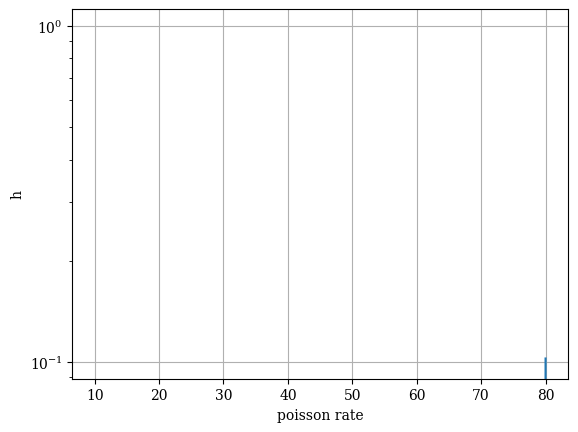

In [1]:
from spike_train_tools.ising import run_metropolis, plot_ising_overview, activity, covariance, fit_ising
from spike_train_tools.tools import simulate_spiketrains

import numpy as np
import matplotlib.pyplot as plt


rates = [10, 20, 40, 80]
h_means = []
N_neurons = 50
N_its_eq = 1000
N_its_fit = 2500

sample_rate = 100
t_tot = 100

for rate in rates:

    trains_obs = 2*simulate_spiketrains(N_neurons, rate, t_tot, sample_rate)-1

    activity_obs = activity(trains_obs)
    cov_obs = covariance(trains_obs)

    h = 1*np.ones(N_neurons)
    J = -1*np.ones((N_neurons, N_neurons))
    J[np.diag_indices(N_neurons)] = 0
    state0 = 1*np.ones(N_neurons)

    h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0)
                        #h_learning_rate=1, h_learning_rate_scaling=0,
                        #J_learning_rate=1, J_learning_rate_scaling=0)

    h_means.append(np.mean(h))

plt.plot(rates, h_means)
plt.yscale('log')
plt.xlabel('poisson rate')
plt.ylabel('h')
plt.grid()
plt.show()

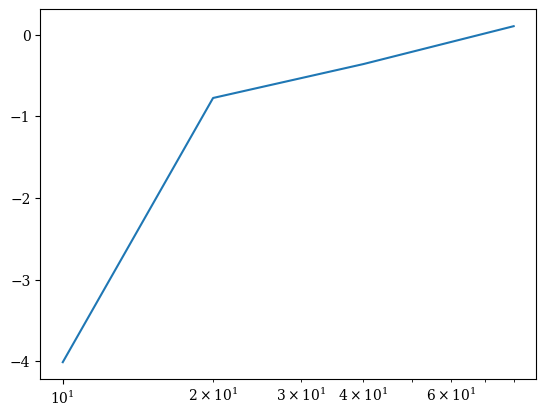

In [7]:
plt.plot(rates, h_means)
plt.xscale('log')

In [8]:
h_means

[-4.010189742736918,
 -0.7764873617979344,
 -0.3614131678296399,
 0.10237983621495633]

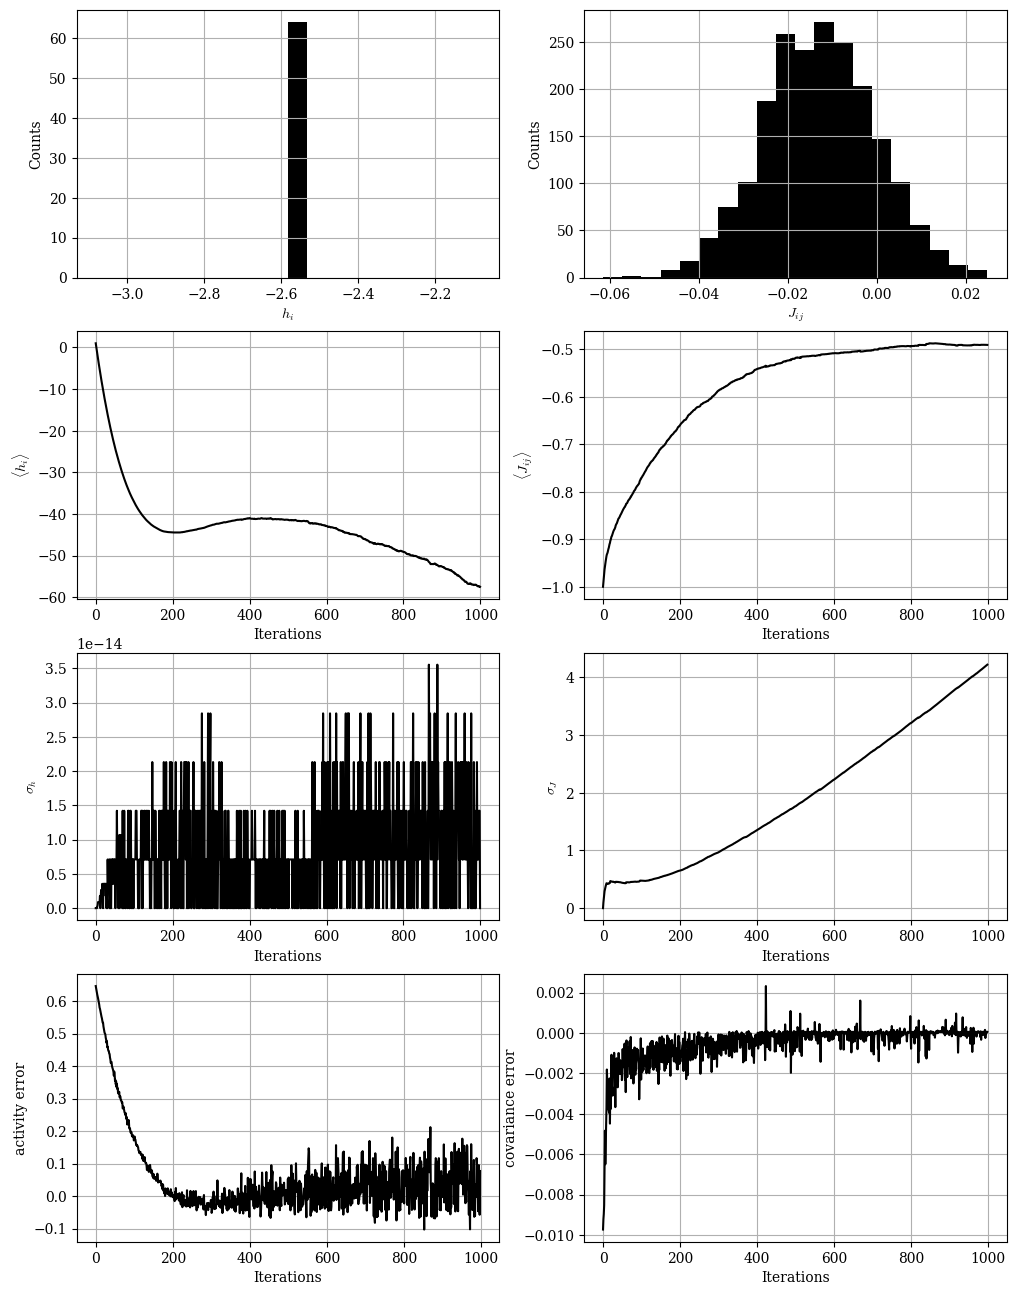

In [44]:
plot_fit_results(h, J, info)

KEY                  SHAPE                TYPE                 VALUE
units                (65,)                ndarray[dict]        array([{'unit_id': 29, 'spike_train': array([  73313,   88115,   88224,   88298,
locations            (978, 2)             ndarray[ndarray]     array([[ 787.5, 1032.5],       [1522.5,  805. ],       [1050. ,  892.5],       .
fs                   ()                   ndarray              array(20000.)                                                                   

Each entry of the array of units is a dictionary:

unit_id              ()                   int                  29                                                                              
spike_train          (49,)                ndarray[int64]       array([  73313,   88115,   88224,   88298,  112396,  322585,  322677,        538
x_max                ()                   float64              2537.5                                                                          
y_max          

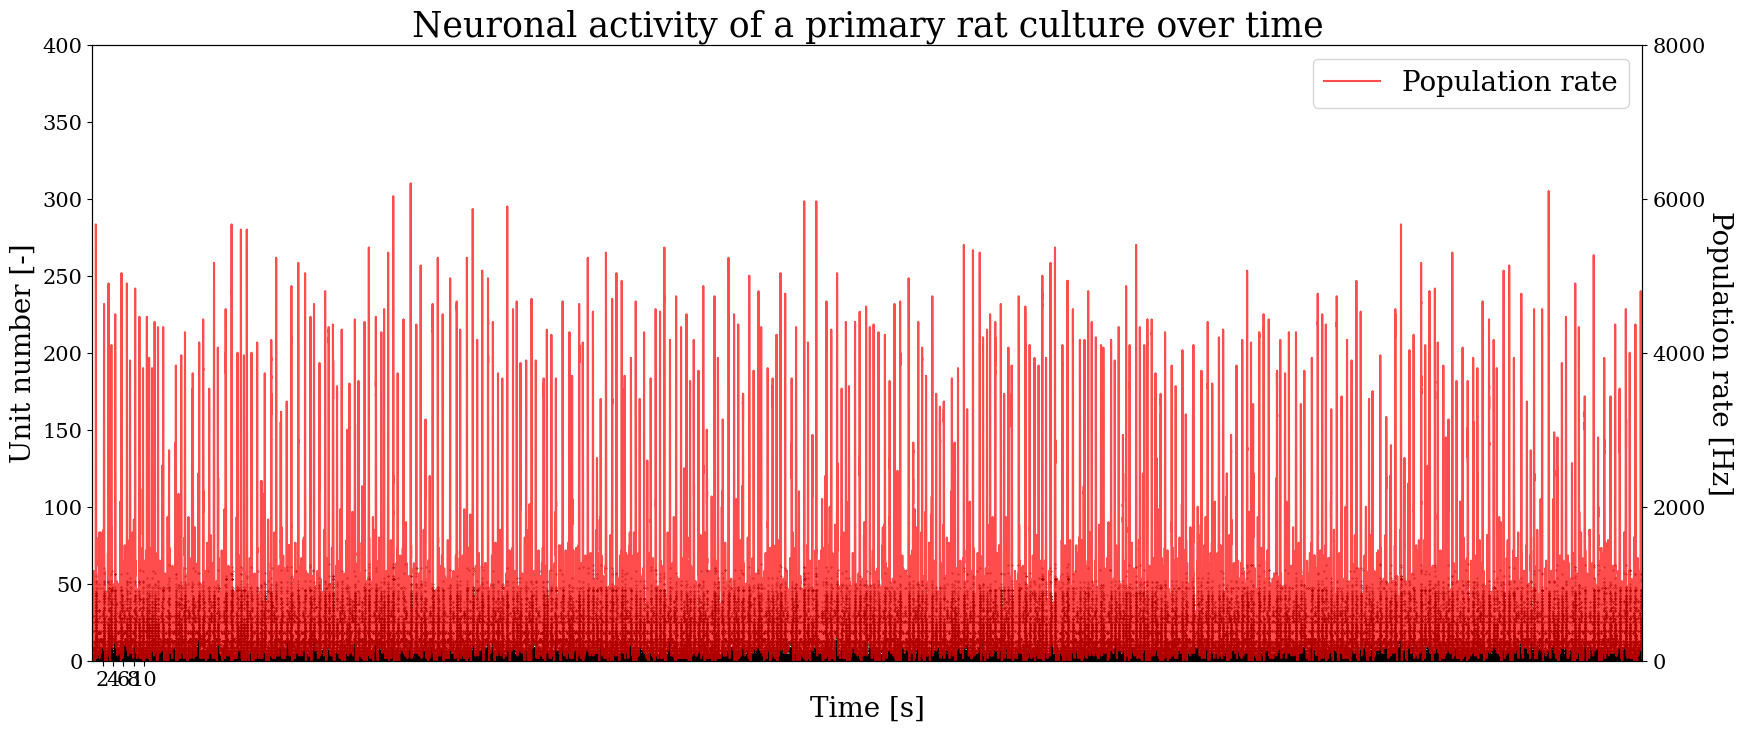

  0%|          | 6/9999 [00:09<4:28:05,  1.61s/it]


SystemError: CPUDispatcher(<function run_metropolis at 0x0000011B57EADBC0>) returned a result with an exception set

In [43]:
from MEAData import MEAData

file_path = 'C:\\Users\\bow-lab\\Documents\\Code\\data\\ABAB\\ABAB_3\\25286\\A_1\\chunk0\\sorted.npz'

mea_data = MEAData(file_path, file_type='raw', pressure=0.0, overview=True)

mea_data.raster_plot()

trains_obs = 2*mea_data.convert_trains_to_binary()[:,:200000] - 1

N_neurons = mea_data.N_units
N_its_eq = 1000
N_its_fit = 10000

activity_obs = activity(trains_obs)
cov_obs = covariance(trains_obs)

#stt.plot_ising_overview(states_obs, energies_obs)

# make initial guesses
h = -0.01*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0
state0 = -1*np.ones(N_neurons)

h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0)

In [ ]:
trains_obs = np.loadtxt('C:\\Users\\bow-lab\\Documents\\Code\\data\\Sampaio et. al\\sample1.dat', delimiter=',').T

N_neurons, N_samples = np.shape(trains_obs)

N_its_eq = 1000
N_its_fit = 60000

activity_obs = activity(trains_obs)
cov_obs = covariance(trains_obs)

# make initial guesses
h = -0.01*np.ones(N_neurons)
J = 0.01*np.ones((N_neurons, N_neurons))
J[np.diag_indices(N_neurons)] = 0
state0 = -1*np.ones(N_neurons)

h, J, info = fit_ising(trains_obs, h, J, N_its_eq, N_its_fit, state0,
                           h_learning_rate=.001, h_learning_rate_scaling=0,
                           J_learning_rate=.001, J_learning_rate_scaling=0)

100%|██████████| 59999/59999 [11:39:25<00:00,  1.43it/s]  


In [36]:
trains_obs = np.loadtxt('C:\\Users\\bow-lab\\Documents\\Code\\data\\Sampaio et. al\\sample2.dat', delimiter=',').T


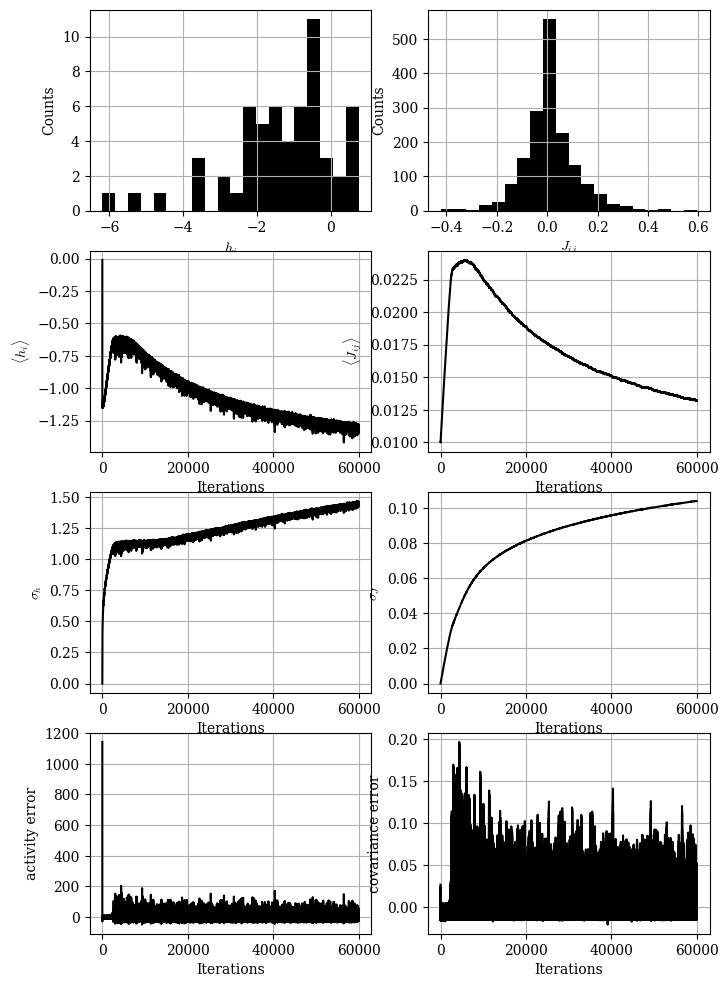

In [21]:
plot_fit_results(h, J, info)

(50000.0, 60000.0)

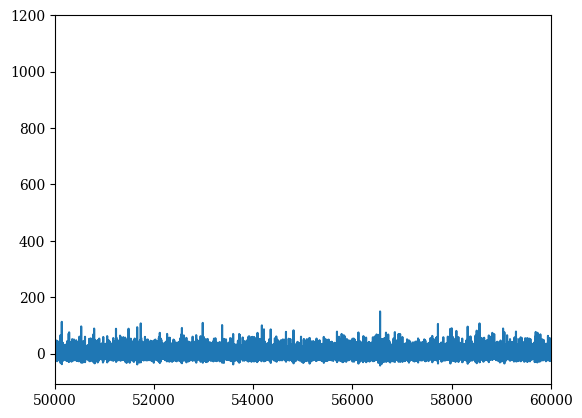

In [23]:
plt.plot(np.mean(info['act_err'], axis=1))
plt.xlim(5e4, 6e4)

In [9]:
np.shape(info['act_err'])

(9999, 58)

(array([ 3.,  1.,  5., 11.,  6., 11.,  7.,  4.,  3.,  2.]),
 array([-237.5726354 , -194.86419956, -152.15576371, -109.44732786,
         -66.73889201,  -24.03045617,   18.67797968,   61.38641553,
         104.09485138,  146.80328723,  189.51172307]),
 <BarContainer object of 10 artists>)

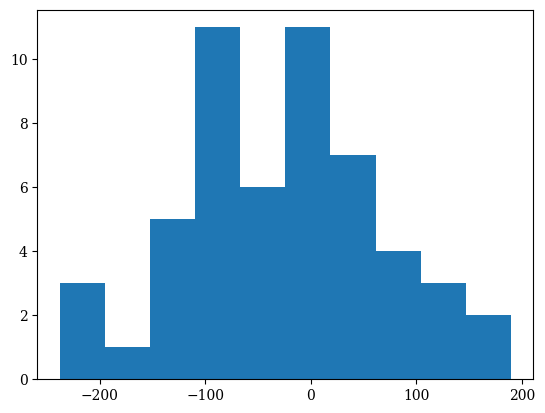

In [19]:
plt.hist(h[np.where(h>=-500)])

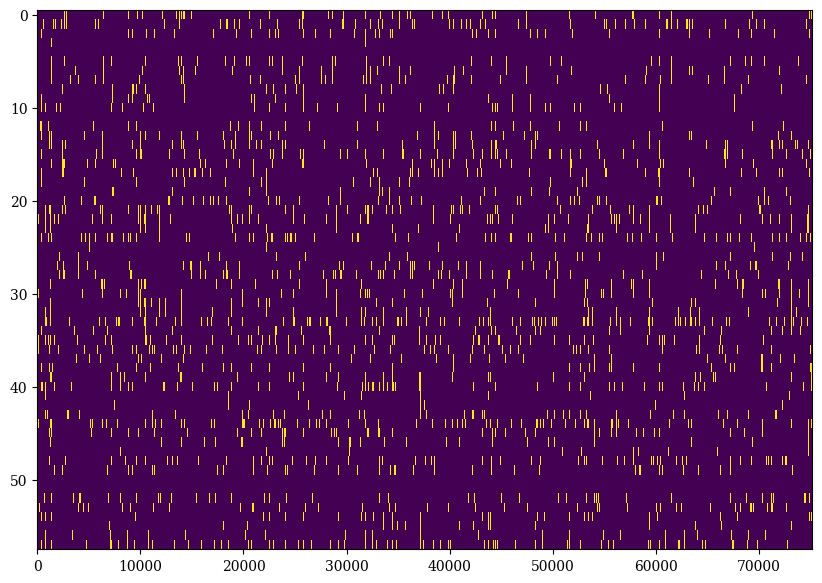

In [34]:
trains_obs = np.loadtxt('C:\\Users\\bow-lab\\Documents\\Code\\data\\Sampaio et. al\\sample1.dat', delimiter=',').T

plt.figure(figsize=(10, 7))
plt.imshow(trains_obs, aspect='auto', interpolation='nearest')

In [37]:
cov = covariance(trains_obs)

(array([ 0.40118889,  0.64190223,  2.2466578 ,  6.25854672, 23.26895574,
        44.45172924, 20.78158461, 16.84993347,  9.78900897,  4.01188892,
         1.92570668,  0.88261556,  0.72214001,  0.16047556,  0.24071334]),
 array([-0.03895812, -0.03141852, -0.02387892, -0.01633932, -0.00879972,
        -0.00126012,  0.00627948,  0.01381908,  0.02135868,  0.02889828,
         0.03643788,  0.04397747,  0.05151707,  0.05905667,  0.06659627,
         0.07413587]),
 <BarContainer object of 15 artists>)

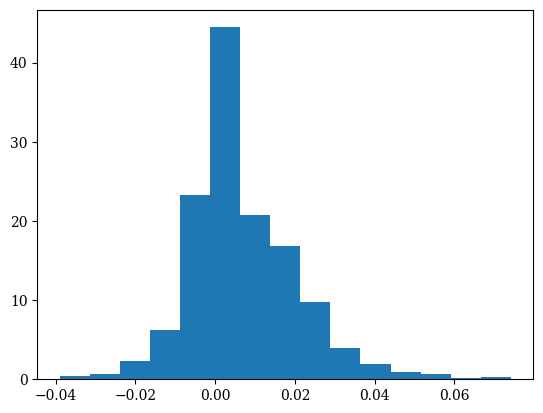

In [38]:
plt.hist(cov[np.triu_indices(np.shape(cov)[0], k=1)], bins=15, density=True)

In [28]:
trains_obs, np.shape(trains_obs)

(array([[-1., -1.,  1., ..., -1., -1., -1.],
        [-1., -1., -1., ...,  1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1.,  1.]]),
 (58, 75204))

In [29]:
np.shape(activity(trains_obs))

(58,)

In [31]:
np.mean(trains_obs, axis=1)

array([-0.90737195, -0.8752194 , -0.89519175, -0.99864369, -0.99986703,
       -0.91713207, -0.94335408, -0.91330248, -0.94601351, -0.95830009,
       -0.91963193, -0.99922876, -0.93290251, -0.9038615 , -0.88569757,
       -0.87652253, -0.89872879, -0.91407372, -0.95678421, -0.93891282,
       -0.88519228, -0.84825275, -0.85923621, -0.93933833, -0.84391788,
       -0.98047976, -0.93593426, -0.90939312, -0.88011276, -0.90141482,
       -0.87487368, -0.91976491, -0.92689219, -0.74844423, -0.90551035,
       -0.84588586, -0.83224297, -0.94045529, -0.91032392, -0.91364821,
       -0.85710866, -0.96274134, -0.96734216, -0.90112228, -0.81668528,
       -0.89011223, -0.95186426, -0.96654433, -0.83809372, -0.90138822,
       -0.99984043, -0.99978725, -0.89189405, -0.88370299, -0.93577469,
       -0.96226265, -0.9282485 , -0.84471571])

In [34]:
cov[np.triu_indices(np.shape(cov)[0], k=1)]

array([0.03226927, 0.03220448, 0.0015764 , ..., 0.02143994, 0.02631912,
       0.05252494])